In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# show all columns 
pd.set_option('display.max_columns', None)
# show entire rows
pd.set_option('display.max_rows', None)
# show all values in a cell
pd.set_option('display.max_colwidth', None)

In [102]:
# Carregamento e exploração dos dados

raw_df = pd.read_excel('../Data/raw_data.xlsx')
raw_df.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380,553020.0,Médio


In [103]:
# Verificando o tamanho do dataset
print('O dataset possui {} linhas e {} colunas'.format(raw_df.shape[0], raw_df.shape[1]))
print('-----------------------------------------')
# Verificando os tipos de dados
print('Tipos de dados:')
print(raw_df.dtypes)

O dataset possui 456 linhas e 24 colunas
-----------------------------------------
Tipos de dados:
codigo            int64
nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia       object
faturamento     float64
potencial        object
dtype: object


Os tipos estão corretos com exceção de rendaMedia, que deveria ser float e está como object. Vamos ver quais valores estão com problemas e corrigi-los.

In [104]:
print('-----------------------------------------')
print('Valores não numéricos na coluna rendaMedia:')
non_numeric_values = raw_df['rendaMedia'].notna() & raw_df['rendaMedia'].str.contains(r'[^\d]+', regex=True)
non_numeric_unique_values = raw_df.loc[non_numeric_values, 'rendaMedia'].unique()
print(non_numeric_unique_values)

-----------------------------------------
Valores não numéricos na coluna rendaMedia:
['-']


In [105]:
# show rows where rendaMedia is not numeric
raw_df.loc[non_numeric_values, :]

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
232,355030170,Eta Guaraú,São Paulo,SP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,NaN,NaN
361,355030227,Pico Do Jaraguá,São Paulo,SP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,NaN,NaN
376,355030167,Reserva Da Cantareira,São Paulo,SP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,NaN,NaN


Onde os valores são '-' vemos que são locais de reserva e não serão passíveis de se montar uma empresa. Dessa forma, podemos remover essas linhas.

In [106]:
# show rows where rendaMedia is null
raw_df.loc[raw_df['rendaMedia'].isnull(), :]

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
6,3304557082,Anil,Rio de Janeiro,RJ,24855,2427,1227,1777,1804,3730,5573,3556,4761,355,759,1771,1863,1902,1155,326,424,NaN,1092081.0,Baixo
26,3304557005,Catumbi,Rio de Janeiro,RJ,12910,1773,805,1018,999,1985,2526,1516,2288,0,18,261,640,1281,1140,229,703,NaN,791170.0,Baixo
52,3304557086,Freguesia (Jacarepaguá),Rio de Janeiro,RJ,72501,7991,3709,5257,5159,10923,16875,9607,12980,698,2569,6042,4941,5055,3919,704,1670,NaN,1297388.0,Médio
71,3304557146,Jacaré,Rio de Janeiro,RJ,9538,1326,629,763,712,1547,1921,1108,1532,0,15,161,492,633,792,197,540,NaN,822849.0,Baixo
89,3304557032,Maracanã,Rio de Janeiro,RJ,25969,1696,843,1370,1921,4020,5134,4124,6861,739,1695,3191,1924,1522,877,0,497,NaN,1384873.0,Baixo
122,3304557006,Rio Comprido,Rio de Janeiro,RJ,44998,5332,2397,3448,3757,7160,9375,5527,8002,0,387,2119,2775,3715,3930,617,1681,NaN,789463.0,Baixo


Quando você possui dados nulos para a variável "rendaMedia" em alguns bairros, há algumas opções para lidar com esses valores ausentes:

1. Remoção de registros: Se a quantidade de registros com valores nulos for pequena em relação ao tamanho total do conjunto de dados, você pode optar por remover esses registros. No entanto, essa abordagem pode resultar na perda de informações potencialmente valiosas, especialmente se esses registros contiverem outras variáveis importantes para a previsão do faturamento.

2. Imputação de valores: Outra opção é realizar a imputação de valores nulos, ou seja, estimar ou preencher esses valores com base em informações disponíveis. Existem várias técnicas de imputação que você pode considerar:

    - Preenchimento por média ou mediana: Calcule a média ou mediana dos valores conhecidos de renda média e preencha os valores nulos com esse valor. Essa abordagem é simples e rápida, mas pode introduzir algum viés nos dados.

    - Imputação por regressão: Utilize outras variáveis disponíveis para criar um modelo de regressão e prever os valores de renda média ausentes com base nas demais características dos bairros. Isso pode ajudar a capturar relações mais complexas entre as variáveis, mas é necessário cuidado para garantir que as variáveis usadas na regressão sejam relevantes e não introduzam vieses indesejados.

    - Imputação por K-NN: Utilize o algoritmo k-vizinhos mais próximos (K-NN) para imputar os valores ausentes. Nesse caso, você encontra os k bairros mais semelhantes ao bairro com dados ausentes com base em outras características disponíveis e preenche o valor nulo com a média ou mediana desses bairros mais próximos. Essa abordagem leva em consideração a semelhança entre os bairros, mas é importante escolher um valor adequado para k.

    - Imputação múltipla: Essa técnica envolve a criação de múltiplas imputações para os valores ausentes com base em modelos estatísticos ou de aprendizado de máquina. Essas imputações múltiplas levam em consideração a incerteza associada à imputação de valores e podem fornecer estimativas mais precisas.

In [107]:
# calculo da % de dados nulos do RJ
rj_null = raw_df.loc[raw_df['estado'] == 'RJ', 'rendaMedia'].isnull().sum()
rj_total = raw_df.loc[raw_df['estado'] == 'RJ', 'rendaMedia'].shape[0]
rj_null_percent = rj_null / rj_total * 100
print('A % de dados nulos da coluna rendaMedia no estado do RJ é de {:.2f}%'.format(rj_null_percent))

A % de dados nulos da coluna rendaMedia no estado do RJ é de 3.75%


Devido à percentagem de valores nulos do RJ ser inferior a 5%, por simplificade e por ser um MVP, vamos remover os valores nulos. Para a próxima versão do projeto, podemos utilizar a técnica de imputação por regressão.
Dessa forma, podemos também alterar o tipo da coluna rendaMedia para float.

In [108]:
# drop rows where rendaMedia is null and '-' and convert to numeric
clean_df = raw_df.loc[~(raw_df['rendaMedia'].isnull() | raw_df['rendaMedia'].str.contains(r'[^\d]+', regex=True)), :].copy()
clean_df['rendaMedia'] = clean_df['rendaMedia'].astype('float64')

In [109]:
clean_df.dtypes

codigo            int64
nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia      float64
faturamento     float64
potencial        object
dtype: object

In [110]:
clean_df.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0,Médio


In [111]:
# Verificando a quantidade de valores nulos para cada estado
clean_df.groupby('estado').apply(lambda x: x.isnull().sum())

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
estado,,,,,,,,,,,,,,,,,,,,,,,,
RJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,293,293


In [112]:
# Verificando a quantidade de valores unique para cada estado
clean_df.groupby('estado').apply(lambda x: x.nunique())

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
estado,,,,,,,,,,,,,,,,,,,,,,,,
RJ,154,154,1,1,153,153,153,151,152,154,153,153,151,38,101,148,150,152,153,138,153,146,154,3
SP,293,293,1,1,293,288,285,286,285,292,292,291,290,144,214,280,285,285,283,233,283,284,0,0


In [113]:
# Dividindo o dataset entre raw_df_sp e raw_df_rj
clean_df_sp = clean_df[clean_df['estado'] == 'SP']
clean_df_rj = clean_df[clean_df['estado'] == 'RJ']

Aqui, podemos ver que só temos informação de faturamento para o estado do Rio de Janeiro e o dataset de São Paulo tem quase o dobro de linhas do dataset do Rio de Janeiro.

In [114]:
print('-----------------------------------------')
# Valores distintos de cidade, estado e potencial para SP
cidade_sp = clean_df_sp['cidade'].unique()
bairro_sp = clean_df_sp['nome'].unique()
potencial_sp = clean_df_sp['potencial'].unique()

# Valores distintos de cidade, estado e potencial para RJ
cidade_rj = clean_df_rj['cidade'].unique()
bairro_rj = clean_df_rj['nome'].unique()
potencial_rj = clean_df_rj['potencial'].unique()

# Criando um DataFrame para armazenar os valores distintos
tabela_distintos = pd.DataFrame({
    'coluna': ['cidade','bairro', 'potencial'],
    'SP': [cidade_sp, bairro_sp, potencial_sp],
    'RJ': [cidade_rj, bairro_rj, potencial_rj]
})

# Exibindo a tabela comparativa
tabela_distintos

-----------------------------------------


,coluna,SP,RJ
0,cidade,[São Paulo],[Rio de Janeiro]
1,bairro,"[A. E. Carvalho, Aclimação, Adventista, Água Branca, Água Funda, Água Rasa, Águia De Haia, Alfredo Pujol, Alto Da Lapa, Alto Da Mooca, Alto De Pinheiros, Ana Rosa, Anhanguera, Aricanduva, Armênia, Artur Alvim, Bandeirantes, Barra Funda, Bela Vista, Belém, Berrini - Vila Funchal, Bexiga, Boçava, Bom Retiro, Bonfiglioli, Bororé, Bosque Da Saúde, Brás, Brasilândia, Bresser, Brooklin, Butantã, Cachoeirinha, Cambuci, Campo Belo, Campo Grande, Campo Limpo, Cangaíba, Canindé, Cantareira, Capão Redondo, Capivari - Monos, Cardoso De Almeida, Casa Verde, Casa Verde Alta, Catumbi, Cdc Vigor, Ceasa, Centro Empresarial, Chácara Flora, Chácara Itaim, Chácara Klabin, Chácara Santo Antônio, Cidade Ademar, Cidade Dutra, Cidade Líder, Cidade Nitro-Operária, Cidade Quarto Centenário, Cidade Satélite, Cidade Tiradentes, Cidade Universitária, Cidade Vargas, Clínicas, Cocaia, Cohab Jova Rural, Congonhas, Consolação, Cratera - Colônia, Emissário, Encruzilhada - Barragem, Ermelino Matarazzo, Estação Tamanduateí, Fábrica Bandeirante, Fazenda Caguaçu, Fazenda Da Juta, Fazenda Itaim, Fazenda Morumbi, Freguesia Do Ó, Gasômetro, Gleba Pêssego, Glicério, Grajaú, Granja Julieta, Guaianazes, Guarapiranga, Heliópolis, Higienópolis, Horto Florestal, Iguatemi, Independência, Interlagos, Ipiranga, Itaberaba, Itaim Paulista, Itaquera, Jabaquara, Jaçanã, Jaceguava, Jaguaré, Jardim Adalgiza, ...]","[Abolição, Acari, Água Santa, Alto Da Boa Vista, Anchieta, Andaraí, Bancários, Bangu, Barra Da Tijuca, Barra De Guaratiba, Barros Filho, Benfica, Bento Ribeiro, Bonsucesso, Botafogo, Brás De Pina, Cachambi, Cacuia, Caju, Camorim, Campinho, Campo Dos Afonsos, Campo Grande, Cascadura, Catete, Cavalcanti, Centro, Cidade De Deus, Cidade Nova, Cidade Universitária, Cocotá, Coelho Neto, Colégio, Complexo Do Alemão, Copacabana, Cordovil, Cosme Velho, Cosmos, Costa Barros, Curicica, Del Castilho, Deodoro, Encantado, Engenheiro Leal, Engenho Da Rainha, Engenho De Dentro, Engenho Novo, Estácio, Flamengo, Freguesia (Ilha Do Governador), Galeão, Gamboa, Gardênia Azul, Gávea, Gericinó, Glória, Grajaú, Grumari, Guadalupe, Guaratiba, Higienópolis, Honório Gurgel, Humaitá, Inhaúma, Inhoaíba, Ipanema, Irajá, Itanhangá, Jacarepaguá, Jacarezinho, Jardim América, Jardim Botânico, Jardim Carioca, Jardim Guanabara, Jardim Sulacap, Joá, Lagoa, Laranjeiras, Leblon, Leme, Lins De Vasconcelos, Madureira, Magalhães Bastos, Mangueira, Manguinhos, Maré, Marechal Hermes, Maria Da Graça, Méier, Moneró, Olaria, Oswaldo Cruz, Paciência, Padre Miguel, Paquetá, Parada De Lucas, Parque Anchieta, Parque Columbia, Pavuna, Pechincha, ...]"
2,potencial,[nan],"[Médio, Baixo, Alto]"


In [115]:
# Analise de duplicatas em relação ao nome do bairro
print('-----------------------------------------')
print('Quantidade de duplicatas em relação ao nome do bairro:')
print('SP: ', clean_df_sp['nome'].duplicated().sum())
print('RJ: ', clean_df_rj['nome'].duplicated().sum())
# Analise de duplicatas em relação ao codigo
print('-----------------------------------------')
print('Quantidade de duplicatas em relação ao codigo do bairro:')
print('SP: ', clean_df_sp['codigo'].duplicated().sum())
print('RJ: ', clean_df_rj['codigo'].duplicated().sum())

-----------------------------------------
Quantidade de duplicatas em relação ao nome do bairro:
SP:  0
RJ:  0
-----------------------------------------
Quantidade de duplicatas em relação ao codigo do bairro:
SP:  0
RJ:  0


# Analise do RJ

In [116]:
# analise estatistica do RJ
clean_df_rj.describe()

,codigo,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,1.540000e+02,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,1.540000e+02
mean,3.304557e+09,43077.435065,5403.279221,2518.837662,3311.116883,3386.681818,6650.331169,8901.909091,5374.831169,7530.448052,391.974026,596.623377,1856.525974,2395.954545,3586.155844,3072.181818,577.058442,1856.772727,3608.071429,8.701803e+05
std,4.596755e+01,65336.035109,11008.972231,5037.002622,5851.900968,5698.898125,9196.873495,11710.858917,8118.995209,10425.899252,1429.321101,1552.853995,3004.463147,2817.055628,4391.463785,4065.856812,837.320073,2327.010887,6091.865305,4.430037e+05
min,3.304557e+09,173.000000,33.000000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,2.000000,654.000000,2.465100e+04
25%,3.304557e+09,13443.250000,1512.250000,678.250000,945.000000,988.500000,2151.500000,2910.250000,1630.750000,2114.750000,0.000000,0.000000,393.000000,728.000000,1080.250000,774.750000,117.250000,430.500000,1486.000000,7.051840e+05
50%,3.304557e+09,26567.000000,3150.000000,1450.500000,2034.000000,2183.500000,4288.500000,5675.000000,3337.500000,4536.500000,0.000000,104.000000,833.500000,1497.000000,2458.000000,1883.500000,330.000000,1051.500000,1915.500000,8.220250e+05
75%,3.304557e+09,46557.500000,5650.750000,2648.500000,3450.250000,3435.750000,7143.500000,9596.250000,6333.750000,9282.000000,0.000000,351.750000,1909.000000,3079.250000,4261.000000,3627.250000,696.000000,2267.250000,2954.500000,9.325952e+05
max,3.304557e+09,667603.000000,122578.000000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.000000,14833.000000,63887.000000,2.915612e+06


In [117]:
dados_domicilios = ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']
dados_população = ['popAte9','popDe10a14','popDe15a19','popDe20a24','popDe25a34','popDe35a49','popDe50a59','popMaisDe60']
dados_população_total = ['rendaMedia','população']
dados_faturamento = ['faturamento']
# analise dos dados de domicilios por potencial
clean_df_rj[dados_domicilios].groupby(clean_df_rj['potencial']).describe()

domiciliosA1                                                     \
                 count         mean          std  min  25%    50%     75%   
potencial                                                                   
Alto              48.0  1212.625000  2372.113329  0.0  0.0  144.0  1361.5   
Baixo             57.0     1.192982     5.138922  0.0  0.0    0.0     0.0   
Médio             49.0    42.653061   151.089454  0.0  0.0    0.0     0.0   

                   domiciliosA2                                                \
               max        count         mean          std   min    25%    50%   
potencial                                                                       
Alto       13408.0         48.0  1738.041667  2424.389978  83.0  405.5  872.0   
Baixo         32.0         57.0    32.824561    43.647992   0.0    0.0    0.0   
Médio        939.0         49.0   134.346939   174.071411   0.0    0.0  109.0   

                            domiciliosB1                                   \
               75%      max        count         mean          std    min   
potencial                                                                   
Alto       1836.25  11668.0         48.0  4598.479167  4215.679764  971.0   
Baixo        71.00    137.0         57.0   331.263158   216.205220    0.0   
Médio       179.00    956.0         49.0   944.816327   432.675960   57.0   

                                            domiciliosB2               \
               25%     50%     75%      max        count         mean   
potencial                                                               
Alto       2030.75  2995.0  5270.0  19350.0         48.0  4643.291667   
Baixo       123.00   304.0   488.0    913.0         57.0   803.912281   
Médio       693.00   931.0  1207.0   2057.0         49.0  2046.448980   

                                                               domiciliosC1  \
                   std    min     25%     50%     75%      max        count   
potencial                                                                     
Alto       3864.474950  697.0  2386.5  3394.0  5068.0  21237.0         48.0   
Baixo       520.602099    0.0   475.0   686.0  1118.0   2295.0         57.0   
Médio      1473.456962   33.0  1163.0  1789.0  2433.0   8310.0         49.0   

                                                                              \
                  mean          std    min     25%     50%      75%      max   
potencial                                                                      
Alto       5914.750000  6133.470735  365.0  2816.5  4312.0  6335.25  33111.0   
Baixo      1484.298246   943.761281    5.0   674.0  1334.0  2210.00   3573.0   
Médio      3750.102041  3591.657157    7.0  1218.0  2747.0  4767.00  18161.0   

          domiciliosC2                                                   \
                 count         mean          std    min     25%     50%   
potencial                                                                 
Alto              48.0  4329.166667  5291.999909  306.0  1343.0  3304.0   
Baixo             57.0  1482.859649  1121.985635   17.0   522.0  1253.0   
Médio             49.0  3689.653061  4339.805111    3.0   758.0  2172.0   

                            domiciliosD                                       \
               75%      max       count        mean          std  min    25%   
potencial                                                                      
Alto       4443.25  25779.0        48.0  773.770833  1093.706838  0.0  178.5   
Baixo      2303.00   4180.0        57.0  289.122807   244.555652  8.0   77.0   
Médio      4281.00  22160.0        49.0  719.306122   914.285997  0.0  102.0   

                                 domiciliosE                                   \
             50%     75%     max       count         mean          std    min   
potencial                                                                       
Alto       421.5  858.25  4

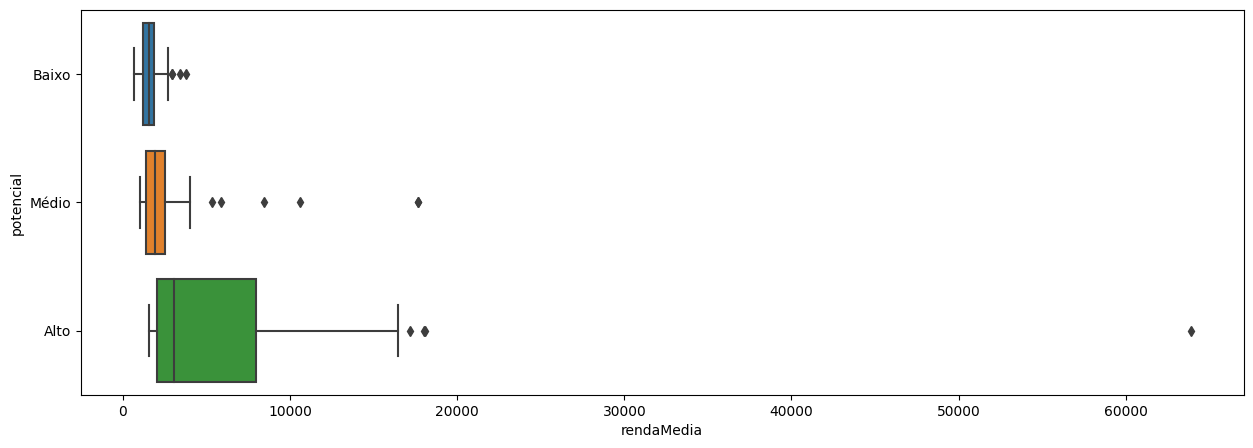

In [118]:
# analise dos domicilios por faixa de rendamedia com boxplot
potencial_order = ['Baixo', 'Médio', 'Alto']
plt.figure(figsize=(15, 5))
sns.boxplot(data=clean_df_rj, x='rendaMedia', y='potencial', orient='h',order=potencial_order)
plt.show()

Agora sabemos que o potencial do bairro está diretamente relacinado com a renda media por domicílio. Podemos criar novas variaveis para analisar o potencial de cada bairro.

In [127]:
# coluna moda domicilios, analisa o maior valor de domicilios por bairro 
clean_df_rj['modaDomicilios'] = clean_df_rj[dados_domicilios].idxmax(axis=1)
clean_df_rj['modaPopulação'] = clean_df_rj[dados_população].idxmax(axis=1)
# renda media maiores de 15 anos, considerando rendaMedia como renda/soma(domicilios)
clean_df_rj['rendaTotal'] = clean_df_rj['rendaMedia']*(clean_df_rj['domiciliosA1']+clean_df_rj['domiciliosA2']+clean_df_rj['domiciliosB1']+clean_df_rj['domiciliosB2']+clean_df_rj['domiciliosC1']+clean_df_rj['domiciliosC2']+clean_df_rj['domiciliosD']+clean_df_rj['domiciliosE'])
# população mais de 15
clean_df_rj['popMaisDe15'] = clean_df_rj['popDe15a19'] + clean_df_rj['popDe20a24'] + clean_df_rj['popDe25a34'] + clean_df_rj['popDe35a49'] + clean_df_rj['popDe50a59'] + clean_df_rj['popMaisDe60']
# população menos de 15
clean_df_rj['popMenosDe15'] = clean_df_rj['popAte9'] + clean_df_rj['popDe10a14']
# renda media maiores de 15
clean_df_rj['rendaMediaMaisDe15'] = np.where(clean_df_rj['popMaisDe15'] != 0,
                                             clean_df_rj['rendaTotal'] / clean_df_rj['popMaisDe15'],
                                             np.nan)

/tmp/ipykernel_3137/3166002520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_rj['modaDomicilios'] = clean_df_rj[dados_domicilios].idxmax(axis=1)
/tmp/ipykernel_3137/3166002520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df_rj['modaPopulação'] = clean_df_rj[dados_população].idxmax(axis=1)
/tmp/ipykernel_3137/3166002520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [128]:
clean_df_rj.head(10)

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial,modaDomicilios,modaPopulação,rendaTotal,popMaisDe15,popMenosDe15,rendaMediaMaisDe15
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,1093,758,92,304,2501.0,932515.0,Médio,domiciliosB2,popMaisDe60,10876849.0,10166,1510,1069.924159
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,2040,2490,827,2506,931.0,588833.0,Baixo,domiciliosE,popDe35a49,7867881.0,20245,7319,388.633292
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,644,522,77,254,2391.0,874200.0,Baixo,domiciliosB2,popDe35a49,6333759.0,7721,1282,820.328843
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,945,584,137,286,3727.0,912226.0,Médio,domiciliosC1,popDe35a49,11754958.0,7996,1610,1470.104802
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0,Médio,domiciliosC2,popDe35a49,25910880.0,45771,11451,566.098184
5,3304557034,Andaraí,Rio de Janeiro,RJ,40476,3528,1703,2564,2753,5993,8071,6022,9842,290,1245,3647,3321,3289,2419,304,1059,3443.0,1204467.0,Alto,domiciliosB1,popMaisDe60,53621282.0,35245,5231,1521.386920
7,3304557115,Bancários,Rio de Janeiro,RJ,12864,1532,670,963,1076,2083,2829,1598,2113,0,82,491,750,1313,1177,172,352,1962.0,808554.0,Baixo,domiciliosC1,popDe35a49,8509194.0,10662,2202,798.086100
8,3304557099,Bangu,Rio de Janeiro,RJ,249987,32651,15949,20926,20146,37750,53090,31246,38229,0,496,5246,13274,24363,22447,4564,11109,1550.0,35465.0,Alto,domiciliosC1,popDe35a49,126323450.0,201387,48600,627.267152
9,3304557131,Barra Da Tijuca,Rio de Janeiro,RJ,139761,13038,5225,7432,8627,21914,32089,21058,30378,13408,11668,14820,5205,3437,1841,0,3897,18084.0,2915612.0,Alto,domiciliosB1,popDe35a49,981527184.0,121498,18263,8078.546017
10,3304557143,Barra De Guaratiba,Rio de Janeiro,RJ,3678,384,205,306,297,520,824,501,641,0,0,92,220,360,225,76,270,1479.0,846531.0,Baixo,domiciliosC1,popDe35a49,1838397.0,3089,589,595.143088


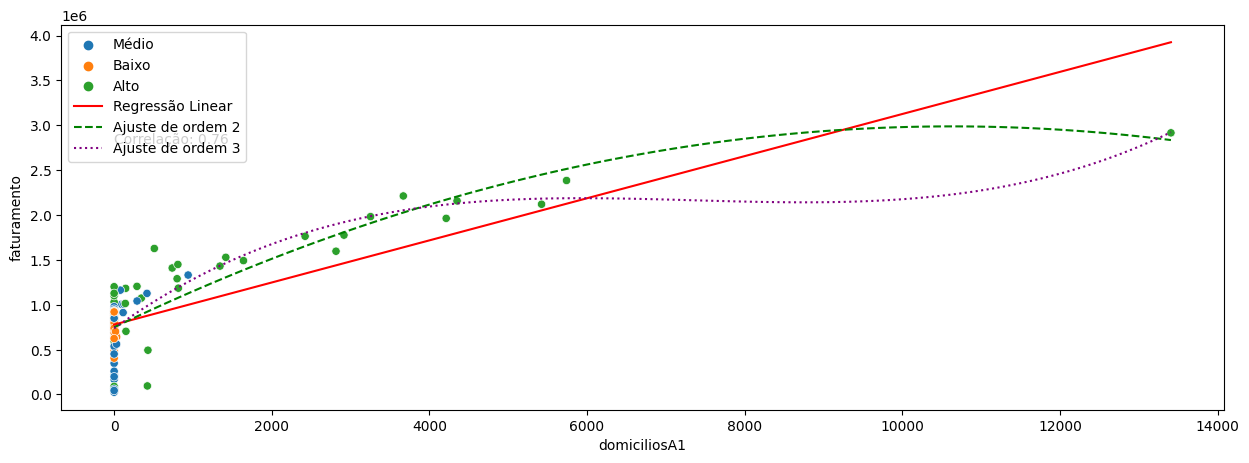

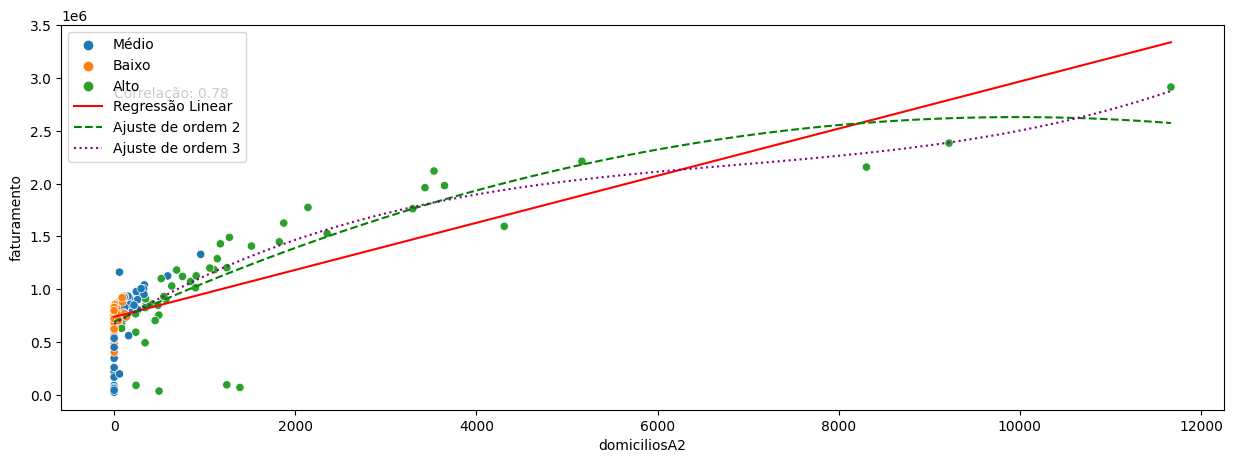

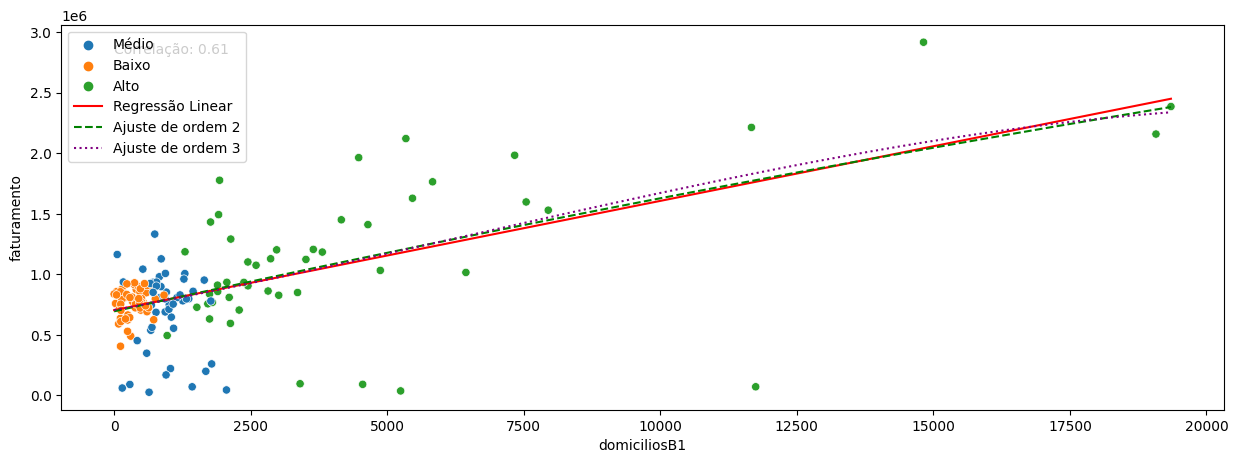

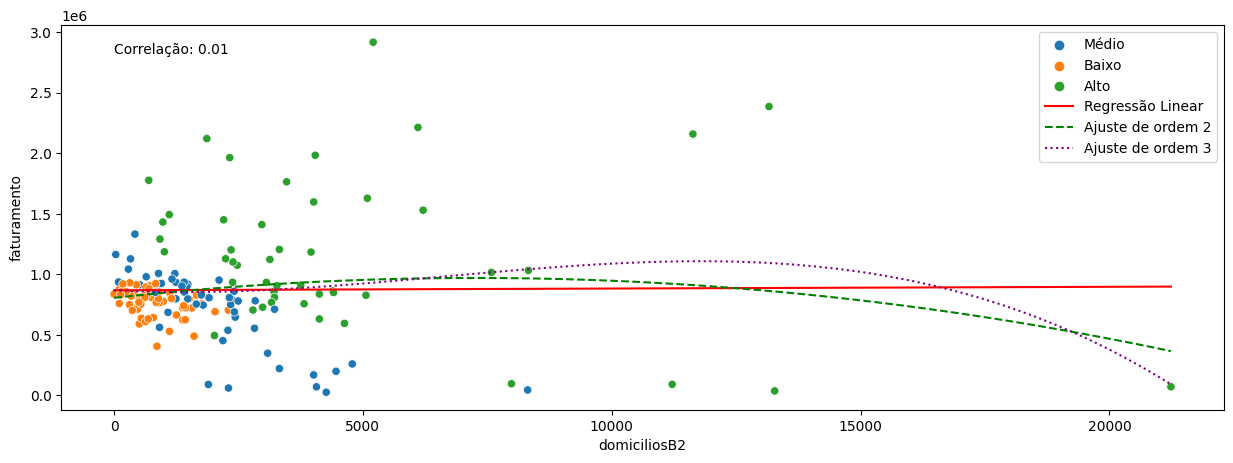

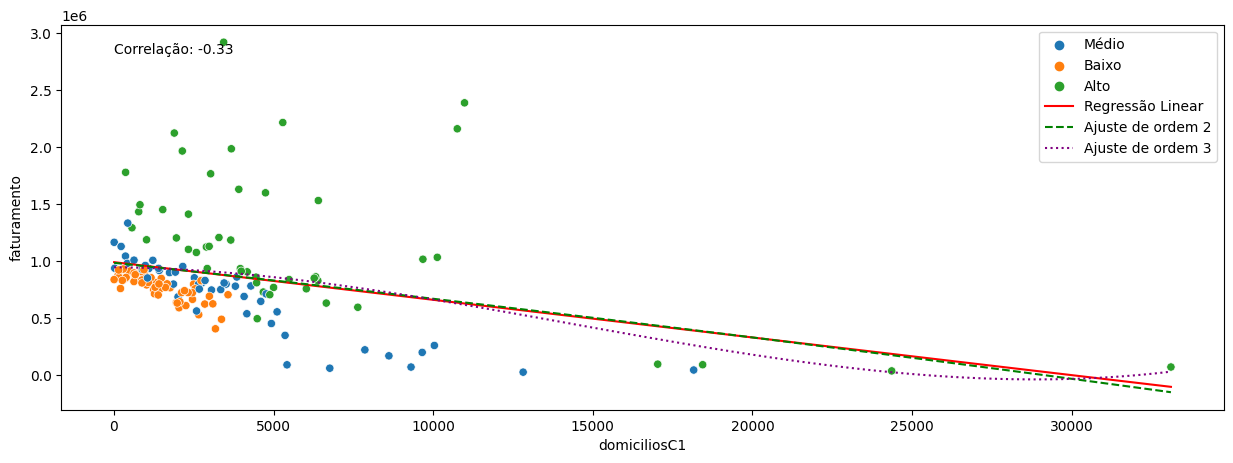

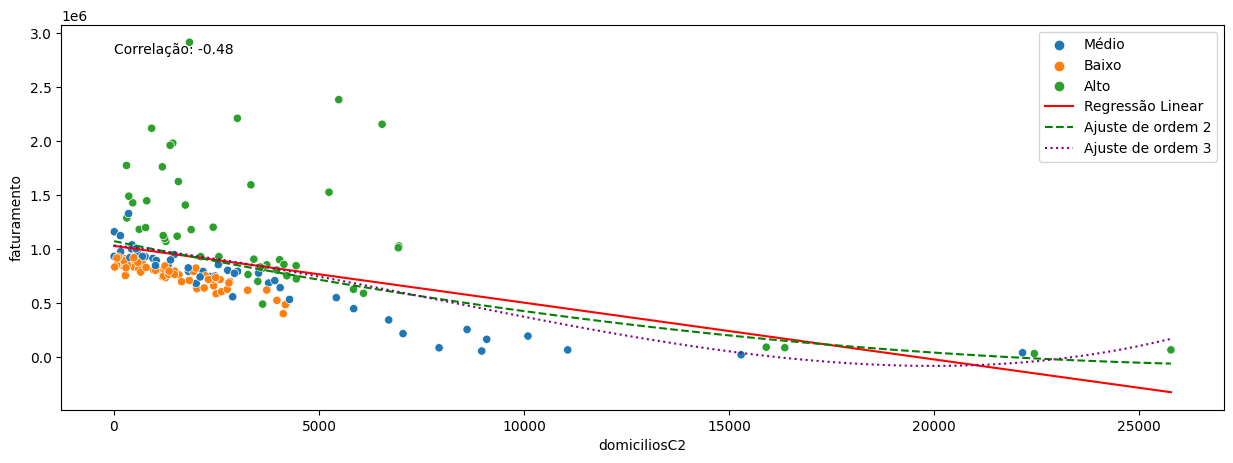

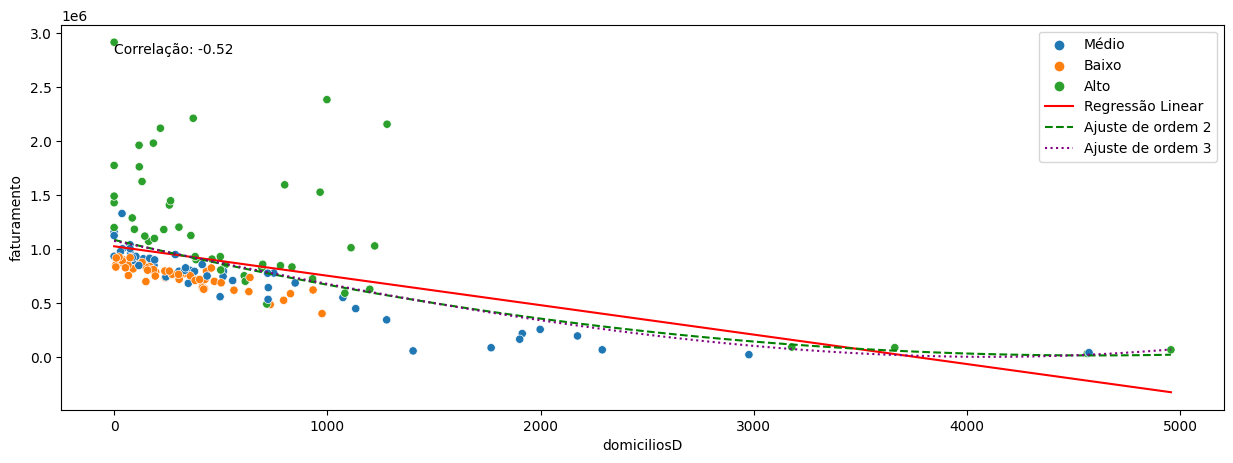

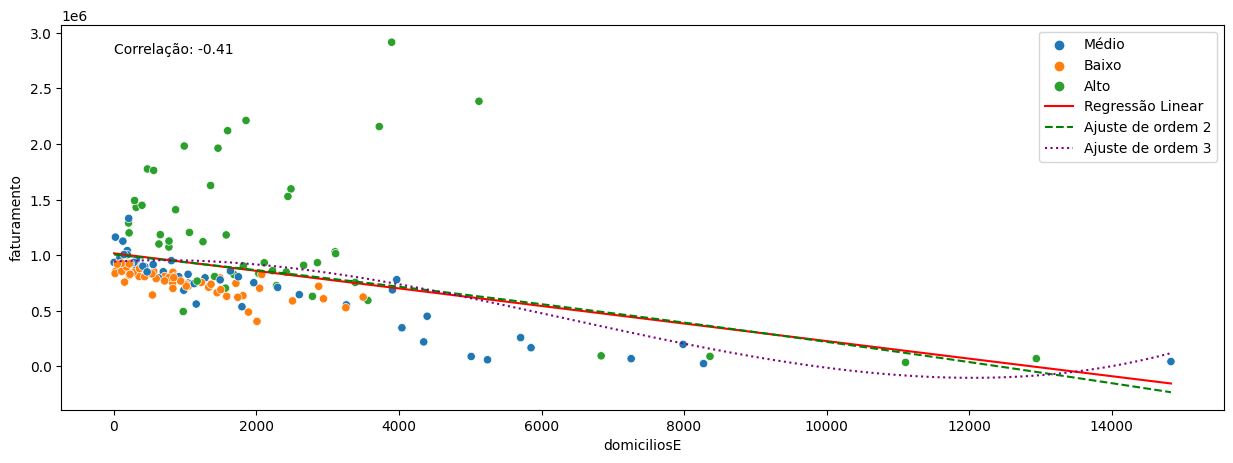

In [146]:
# scatter plot faturamente x all hue potencial adicione uma curva de correlação e o valor da correlação

# Criar um mapeamento de cores para os potenciais
color_map = sns.color_palette("Set1", len(clean_df_rj['potencial'].unique()))
color_mapping = dict(zip(clean_df_rj['potencial'].unique(), color_map))

for i in dados_domicilios:
    plt.figure(figsize=(15, 5))
    
    # Plotar os pontos de dispersão para todos os dados com os eixos invertidos
    sns.scatterplot(data=clean_df_rj, x=i, y='faturamento', hue='potencial')
    
    # Calcular a correlação para todos os dados
    corr = np.corrcoef(clean_df_rj[i], clean_df_rj['faturamento'])[0, 1]
    
    # Plotar a linha de regressão para todos os dados com os eixos invertidos
    slope, intercept, _, _, _ = linregress(clean_df_rj[i], clean_df_rj['faturamento'])
    x_values = np.linspace(clean_df_rj[i].min(), clean_df_rj[i].max(), 100)
    plt.plot(x_values, intercept + slope * x_values, color='red', label='Regressão Linear')
    
    # Ajuste de curva de ordem 2 com os eixos invertidos
    coeffs2 = np.polyfit(clean_df_rj[i], clean_df_rj['faturamento'], 2)
    curve2 = np.poly1d(coeffs2)
    plt.plot(x_values, curve2(x_values), color='green', linestyle='--', label='Ajuste de ordem 2')
    
    # Ajuste de curva de ordem 3 com os eixos invertidos
    coeffs3 = np.polyfit(clean_df_rj[i], clean_df_rj['faturamento'], 3)
    curve3 = np.poly1d(coeffs3)
    plt.plot(x_values, curve3(x_values), color='purple', linestyle=':', label='Ajuste de ordem 3')
    
    # Exibir a correlação no gráfico
    plt.text(clean_df_rj[i].min(), clean_df_rj['faturamento'].max(), f'Correlação: {corr:.2f}', ha='left', va='top', color='black')
    
    plt.legend()
    plt.show()

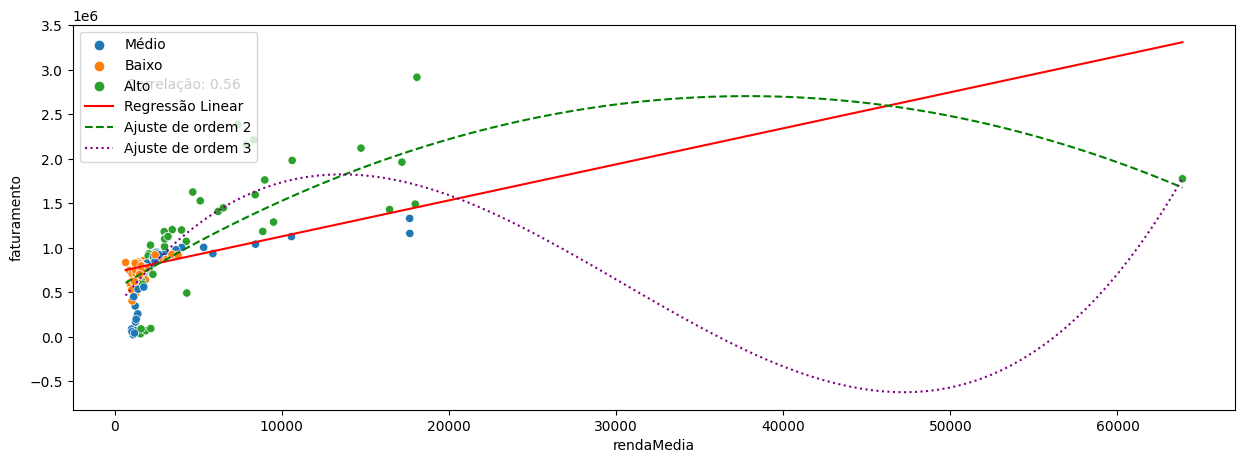

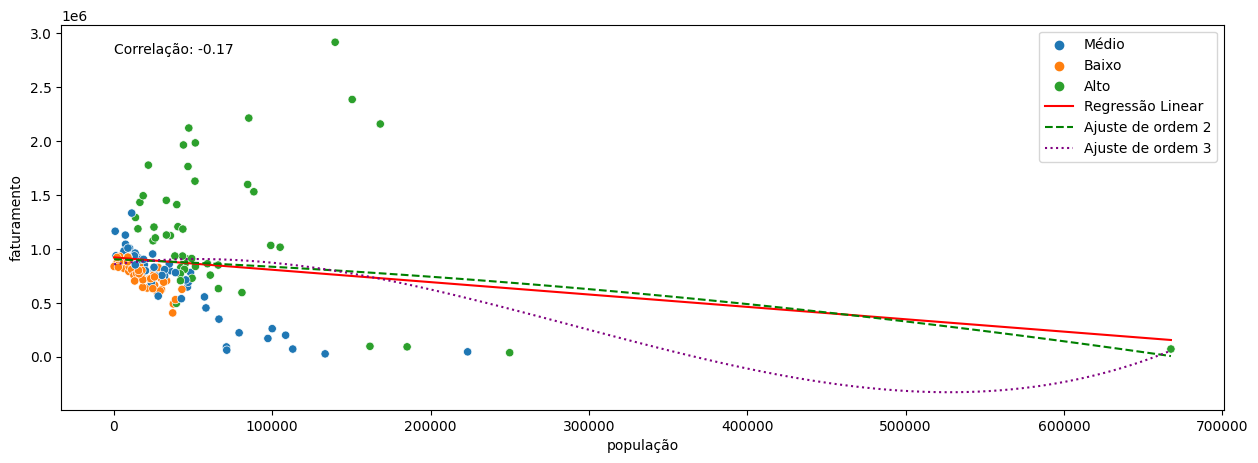

In [148]:
# Criar um mapeamento de cores para os potenciais
color_map = sns.color_palette("Set1", len(clean_df_rj['potencial'].unique()))
color_mapping = dict(zip(clean_df_rj['potencial'].unique(), color_map))

for i in dados_população_total:
    plt.figure(figsize=(15, 5))
    
    # Plotar os pontos de dispersão para todos os dados com os eixos invertidos
    sns.scatterplot(data=clean_df_rj, x=i, y='faturamento', hue='potencial')
    
    # Calcular a correlação para todos os dados
    corr = np.corrcoef(clean_df_rj[i], clean_df_rj['faturamento'])[0, 1]
    
    # Plotar a linha de regressão para todos os dados com os eixos invertidos
    slope, intercept, _, _, _ = linregress(clean_df_rj[i], clean_df_rj['faturamento'])
    x_values = np.linspace(clean_df_rj[i].min(), clean_df_rj[i].max(), 100)
    plt.plot(x_values, intercept + slope * x_values, color='red', label='Regressão Linear')
    
    # Ajuste de curva de ordem 2 com os eixos invertidos
    coeffs2 = np.polyfit(clean_df_rj[i], clean_df_rj['faturamento'], 2)
    curve2 = np.poly1d(coeffs2)
    plt.plot(x_values, curve2(x_values), color='green', linestyle='--', label='Ajuste de ordem 2')
    
    # Ajuste de curva de ordem 3 com os eixos invertidos
    coeffs3 = np.polyfit(clean_df_rj[i], clean_df_rj['faturamento'], 3)
    curve3 = np.poly1d(coeffs3)
    plt.plot(x_values, curve3(x_values), color='purple', linestyle=':', label='Ajuste de ordem 3')
    
    # Exibir a correlação no gráfico
    plt.text(clean_df_rj[i].min(), clean_df_rj['faturamento'].max(), f'Correlação: {corr:.2f}', ha='left', va='top', color='black')
    
    plt.legend()
    plt.show()

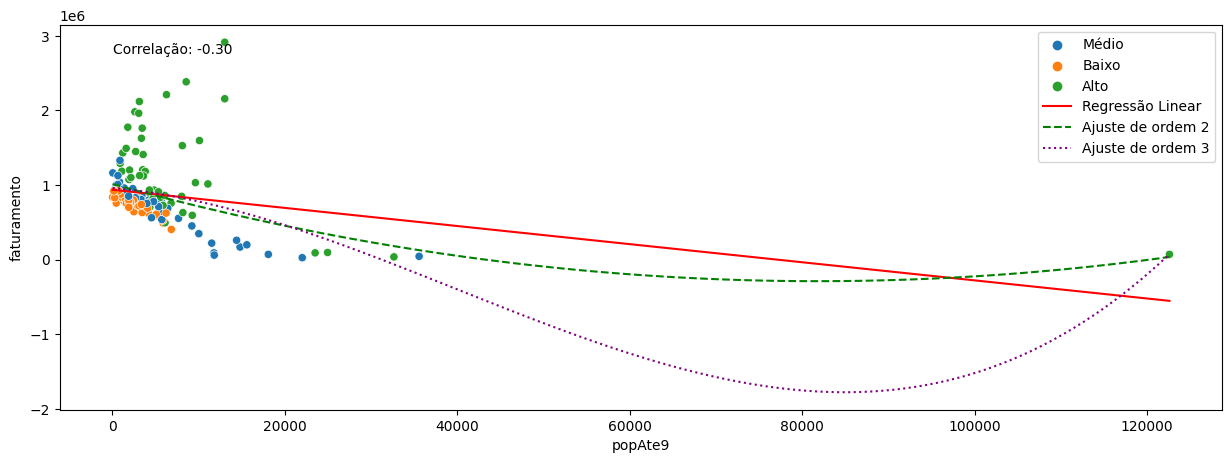

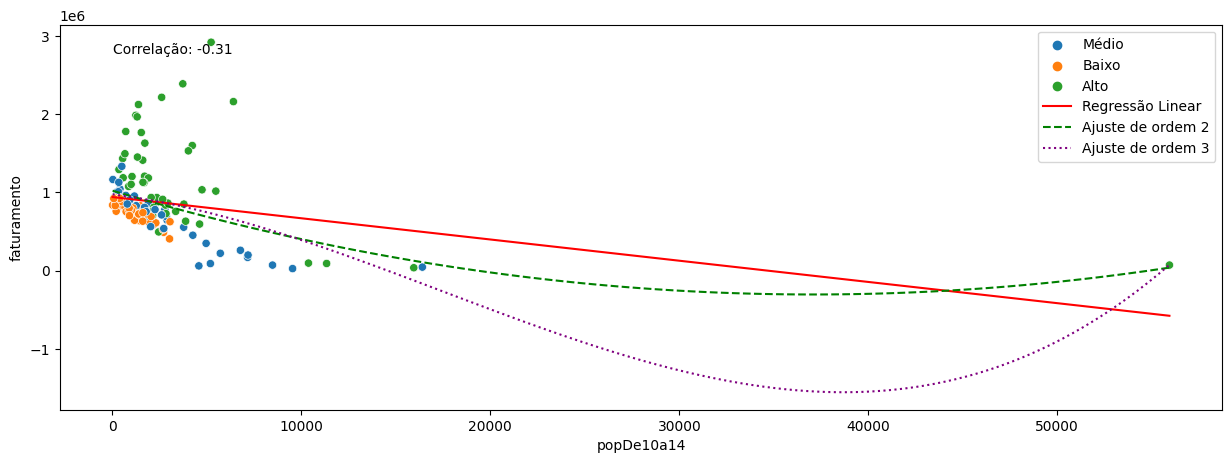

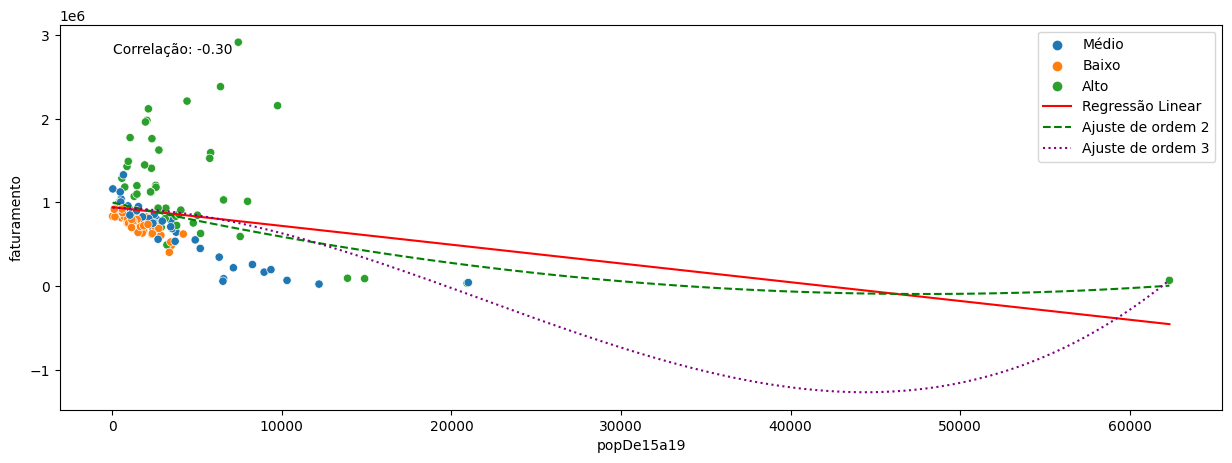

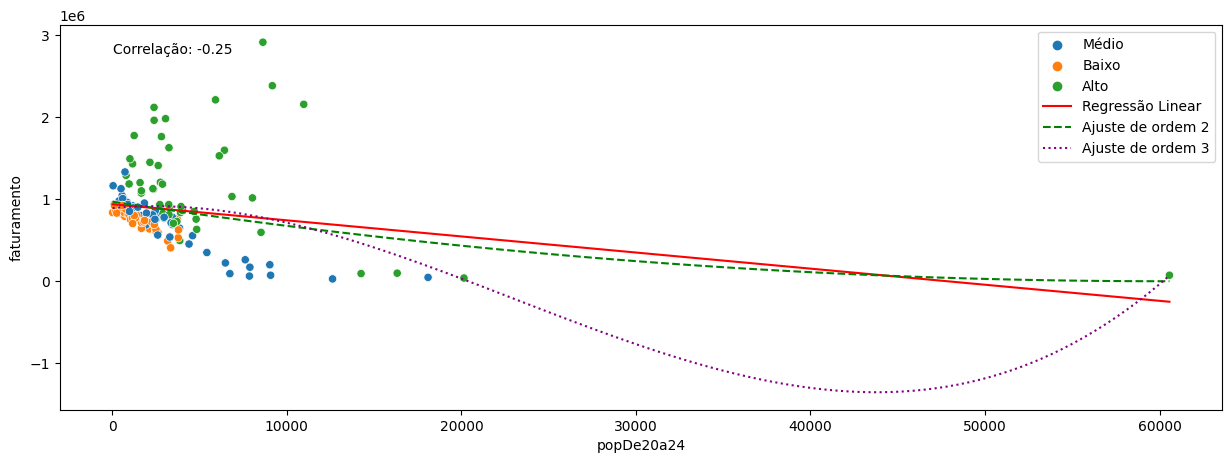

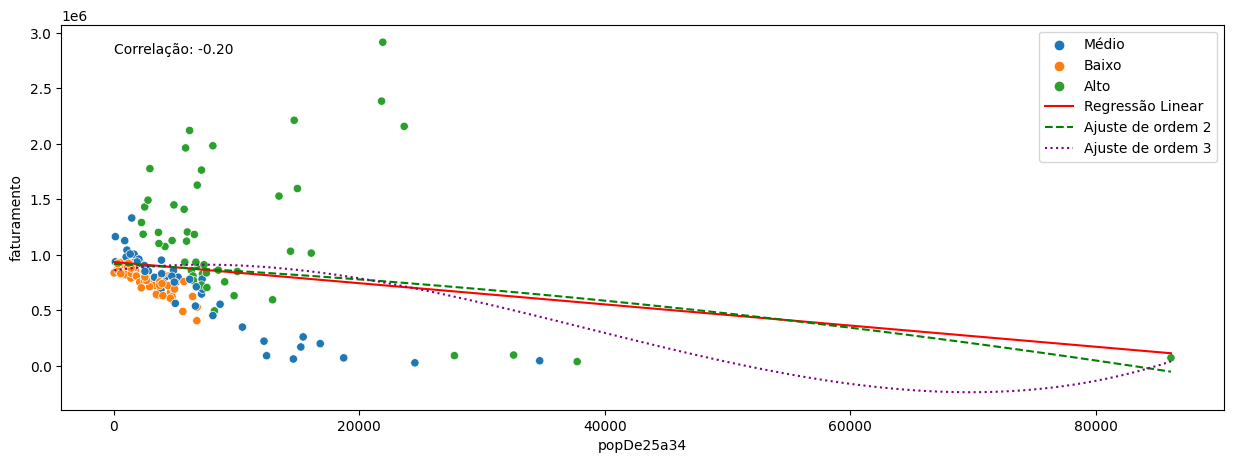

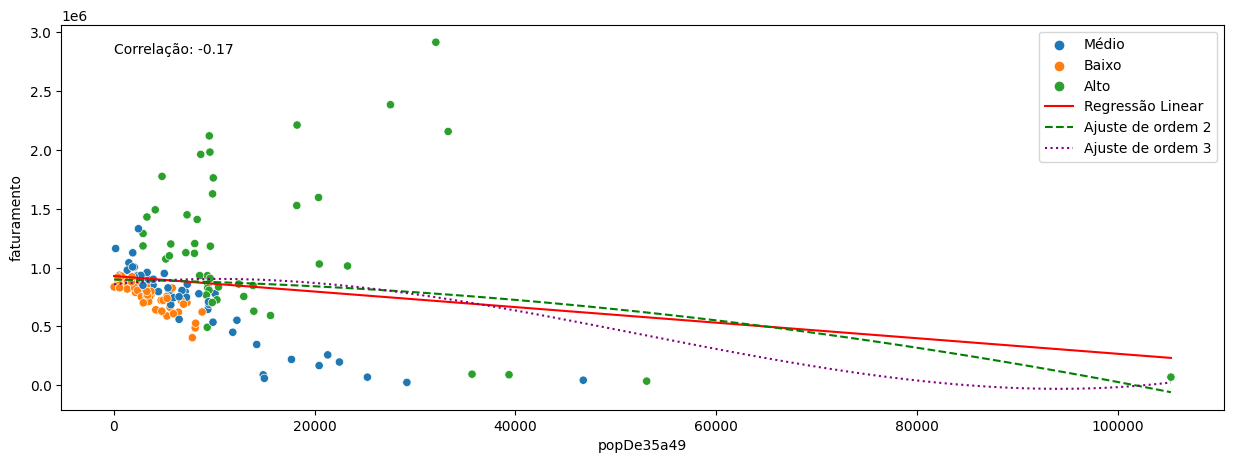

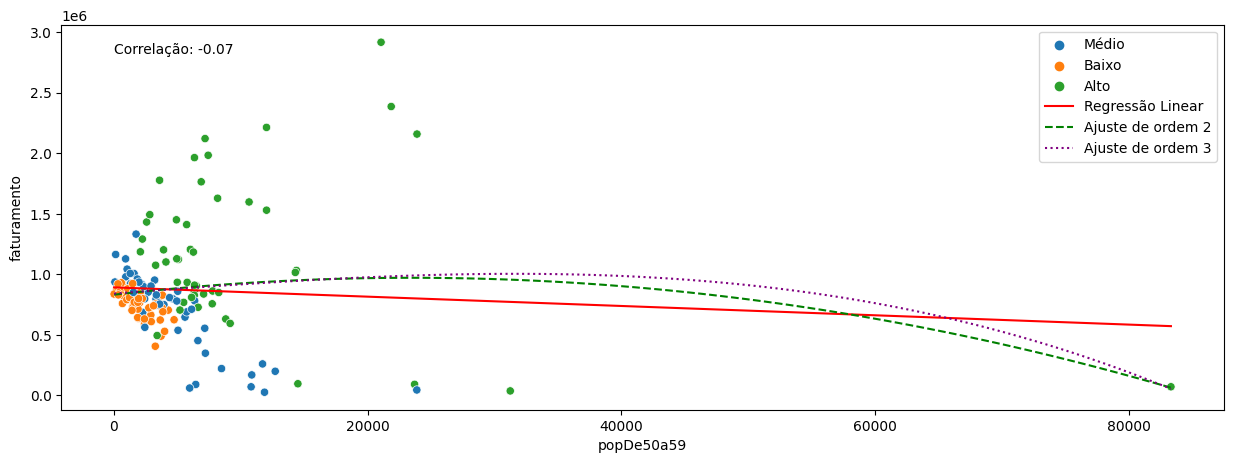

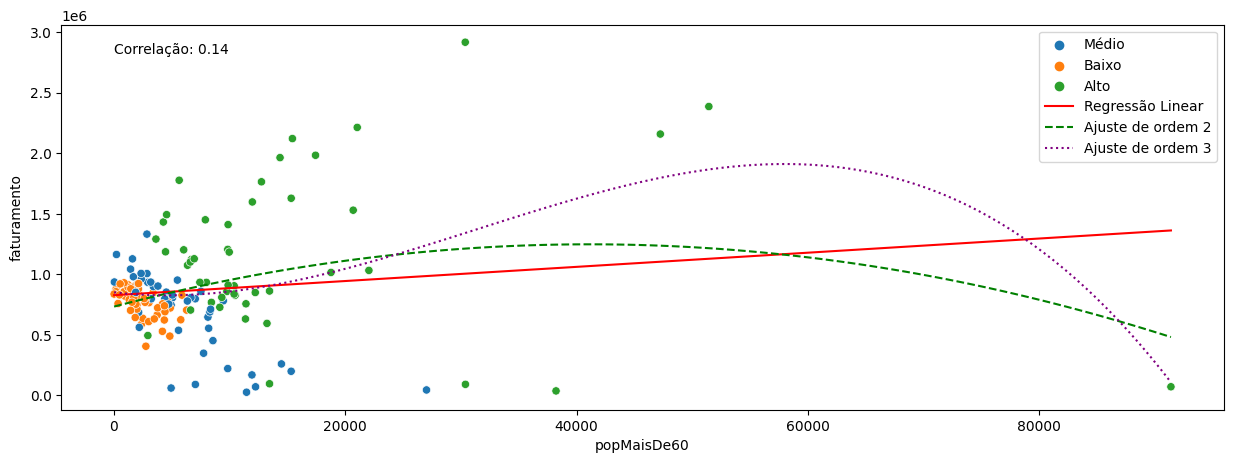

In [149]:
for i in dados_população:
    plt.figure(figsize=(15, 5))
    
    # Plotar os pontos de dispersão para todos os dados com os eixos invertidos
    sns.scatterplot(data=clean_df_rj, x=i, y='faturamento', hue='potencial')
    
    # Calcular a correlação para todos os dados
    corr = np.corrcoef(clean_df_rj[i], clean_df_rj['faturamento'])[0, 1]
    
    # Plotar a linha de regressão para todos os dados com os eixos invertidos
    slope, intercept, _, _, _ = linregress(clean_df_rj[i], clean_df_rj['faturamento'])
    x_values = np.linspace(clean_df_rj[i].min(), clean_df_rj[i].max(), 100)
    plt.plot(x_values, intercept + slope * x_values, color='red', label='Regressão Linear')
    
    # Ajuste de curva de ordem 2 com os eixos invertidos
    coeffs2 = np.polyfit(clean_df_rj[i], clean_df_rj['faturamento'], 2)
    curve2 = np.poly1d(coeffs2)
    plt.plot(x_values, curve2(x_values), color='green', linestyle='--', label='Ajuste de ordem 2')
    
    # Ajuste de curva de ordem 3 com os eixos invertidos
    coeffs3 = np.polyfit(clean_df_rj[i], clean_df_rj['faturamento'], 3)
    curve3 = np.poly1d(coeffs3)
    plt.plot(x_values, curve3(x_values), color='purple', linestyle=':', label='Ajuste de ordem 3')
    
    # Exibir a correlação no gráfico
    plt.text(clean_df_rj[i].min(), clean_df_rj['faturamento'].max(), f'Correlação: {corr:.2f}', ha='left', va='top', color='black')
    
    plt.legend()
    plt.show()

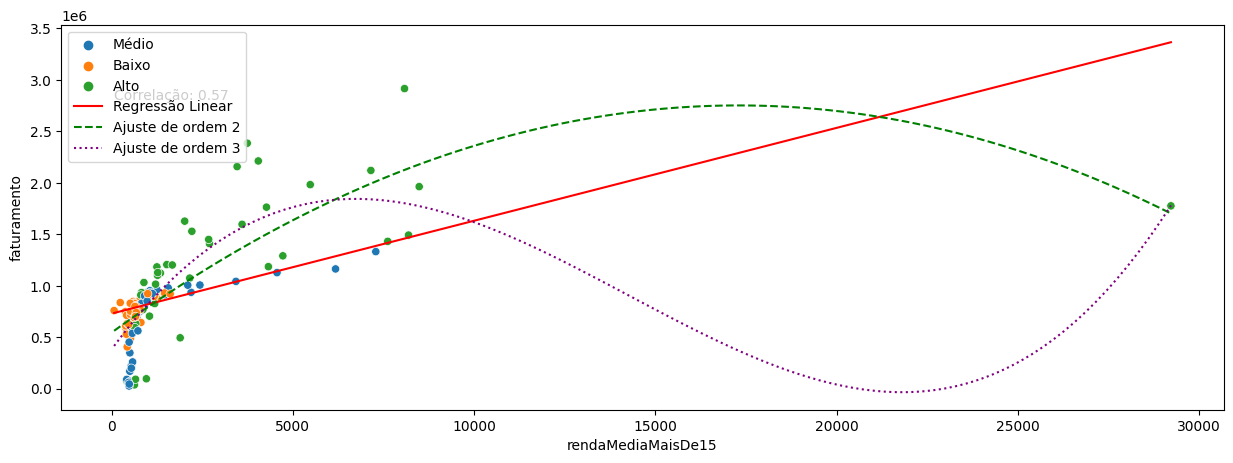

In [150]:
for i in ['rendaMediaMaisDe15']:
    plt.figure(figsize=(15, 5))
    
    # Plotar os pontos de dispersão para todos os dados com os eixos invertidos
    sns.scatterplot(data=clean_df_rj, x=i, y='faturamento', hue='potencial')
    
    # Calcular a correlação para todos os dados
    corr = np.corrcoef(clean_df_rj[i], clean_df_rj['faturamento'])[0, 1]
    
    # Plotar a linha de regressão para todos os dados com os eixos invertidos
    slope, intercept, _, _, _ = linregress(clean_df_rj[i], clean_df_rj['faturamento'])
    x_values = np.linspace(clean_df_rj[i].min(), clean_df_rj[i].max(), 100)
    plt.plot(x_values, intercept + slope * x_values, color='red', label='Regressão Linear')
    
    # Ajuste de curva de ordem 2 com os eixos invertidos
    coeffs2 = np.polyfit(clean_df_rj[i], clean_df_rj['faturamento'], 2)
    curve2 = np.poly1d(coeffs2)
    plt.plot(x_values, curve2(x_values), color='green', linestyle='--', label='Ajuste de ordem 2')
    
    # Ajuste de curva de ordem 3 com os eixos invertidos
    coeffs3 = np.polyfit(clean_df_rj[i], clean_df_rj['faturamento'], 3)
    curve3 = np.poly1d(coeffs3)
    plt.plot(x_values, curve3(x_values), color='purple', linestyle=':', label='Ajuste de ordem 3')
    
    # Exibir a correlação no gráfico
    plt.text(clean_df_rj[i].min(), clean_df_rj['faturamento'].max(), f'Correlação: {corr:.2f}', ha='left', va='top', color='black')
    
    plt.legend()
    plt.show()

## Analise potencial

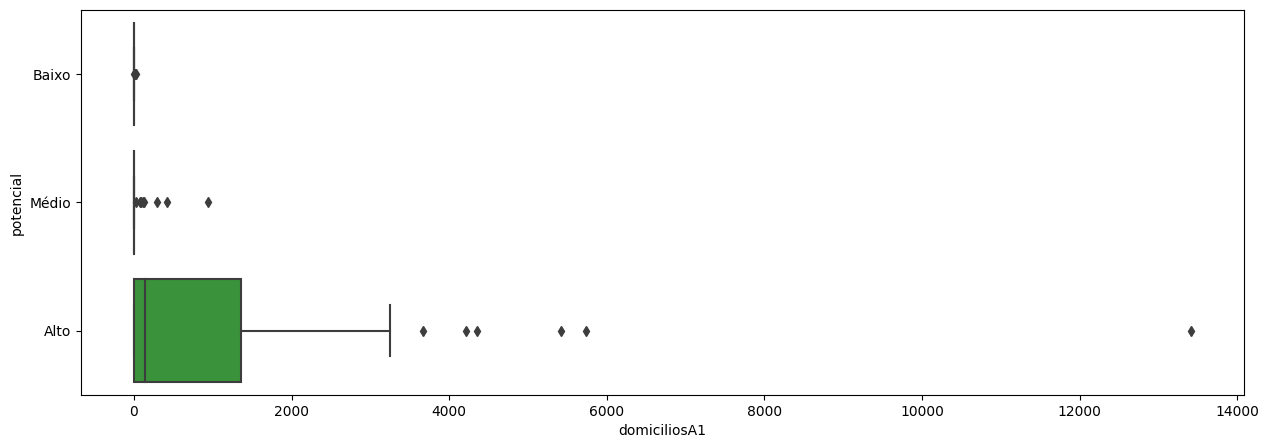

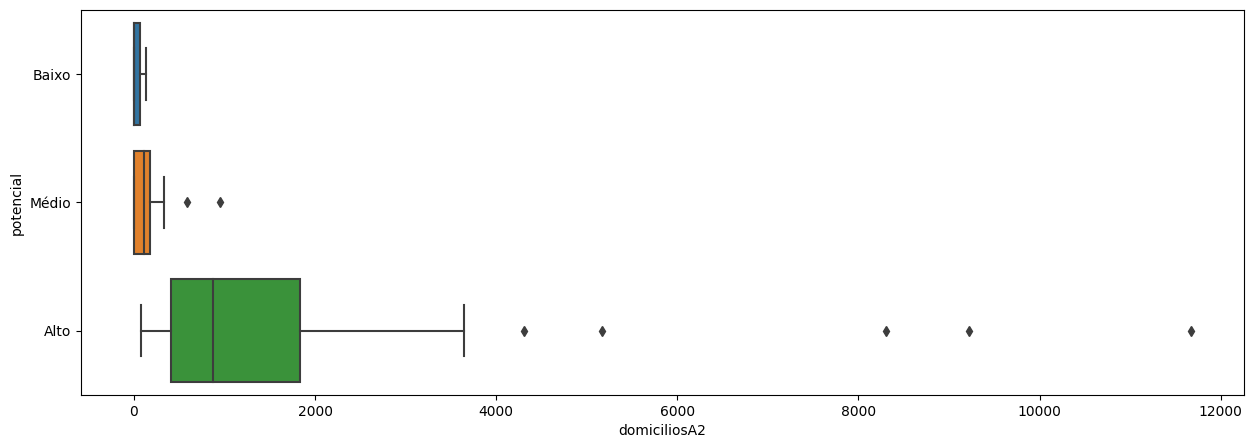

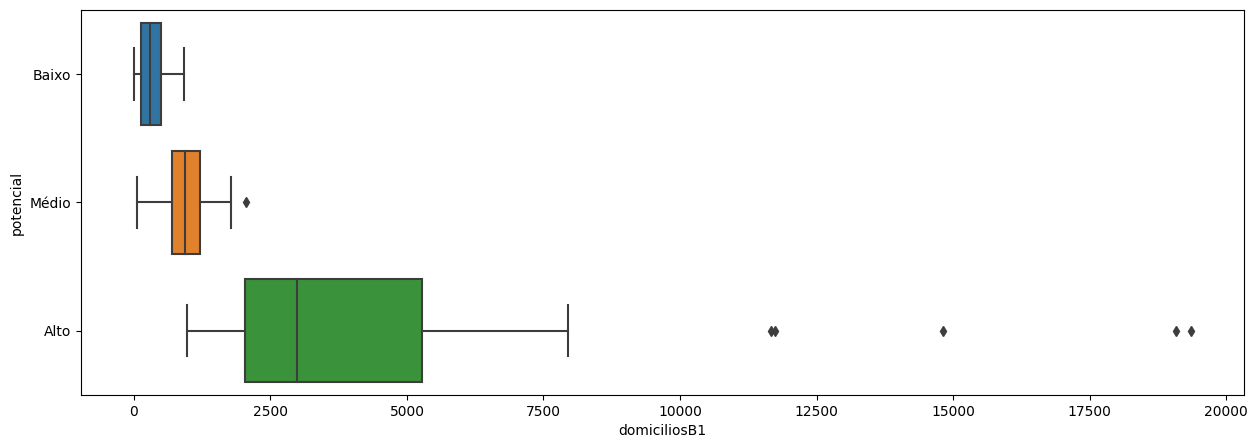

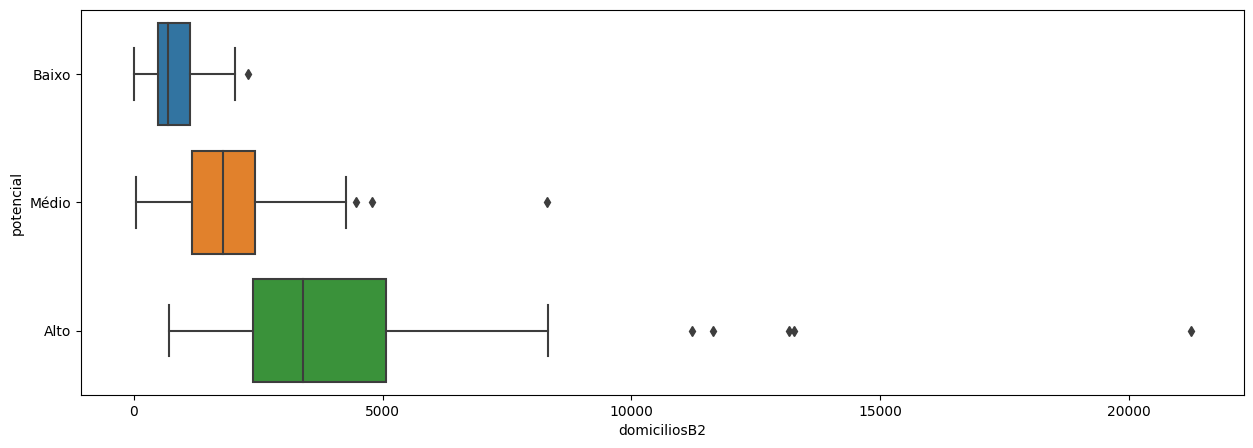

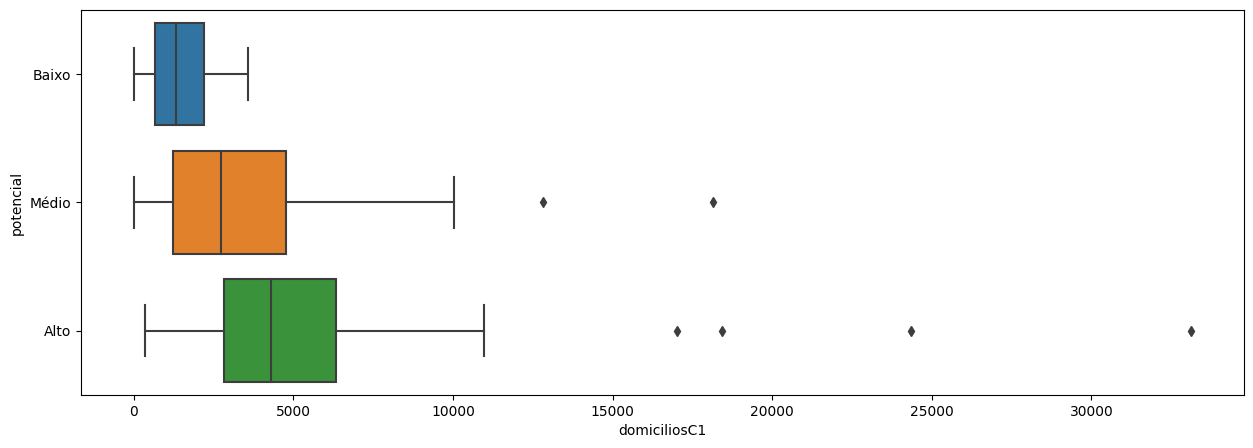

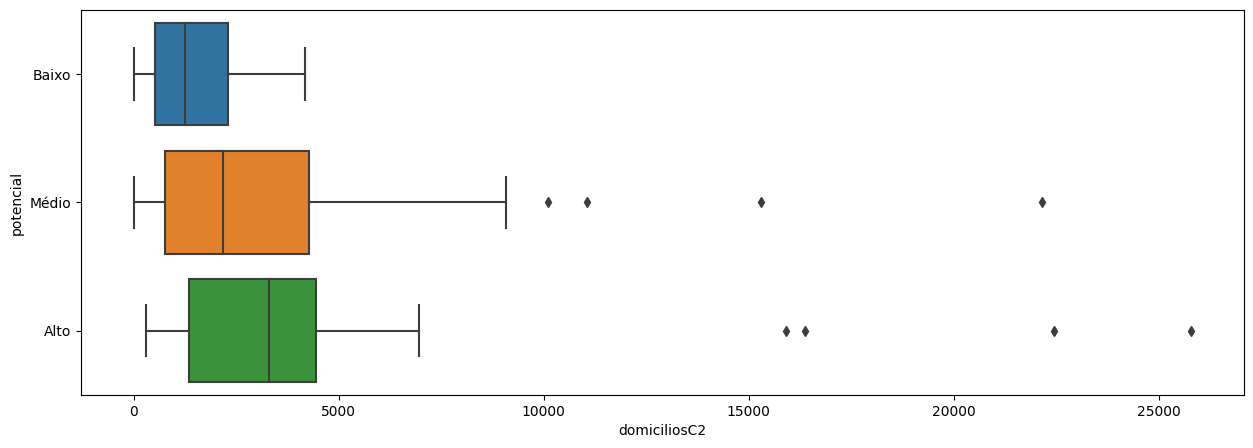

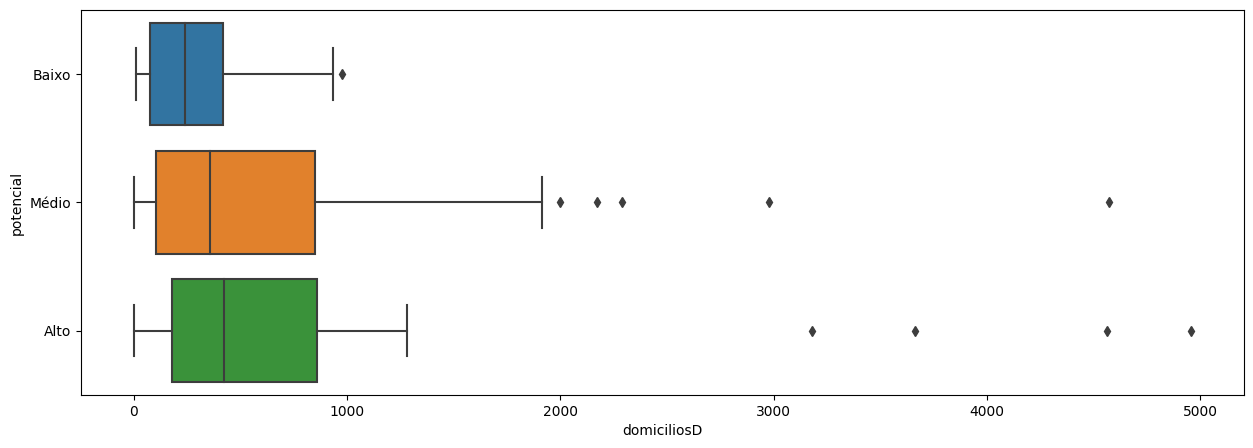

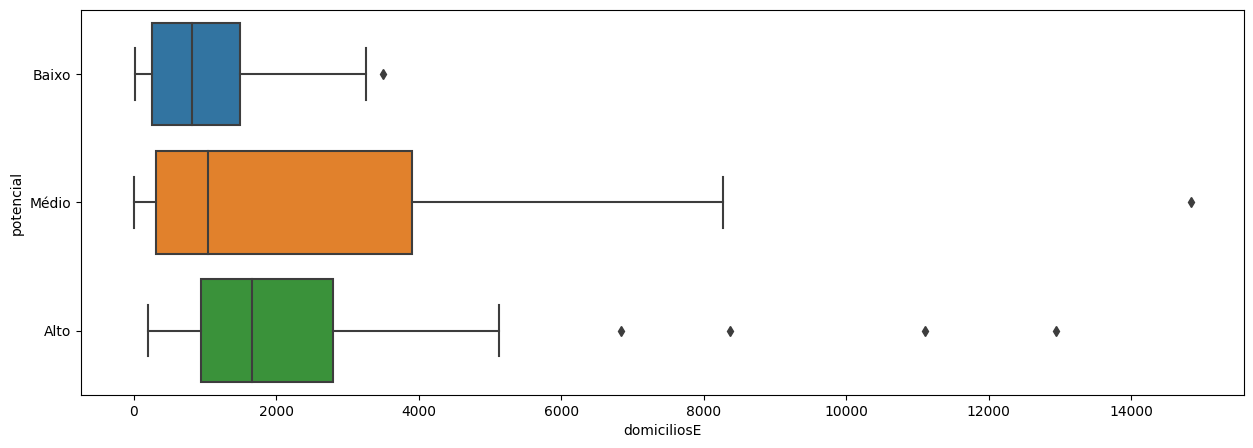

In [122]:
# analise dos dados de domicilios por potencial com boxenplot colocando na ordem 'baixo', 'médio', 'alto'
potencial_order = ['Baixo', 'Médio', 'Alto']

for dado in dados_domicilios:
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=clean_df_rj, x=dado, y='potencial', order=potencial_order)
    plt.show()

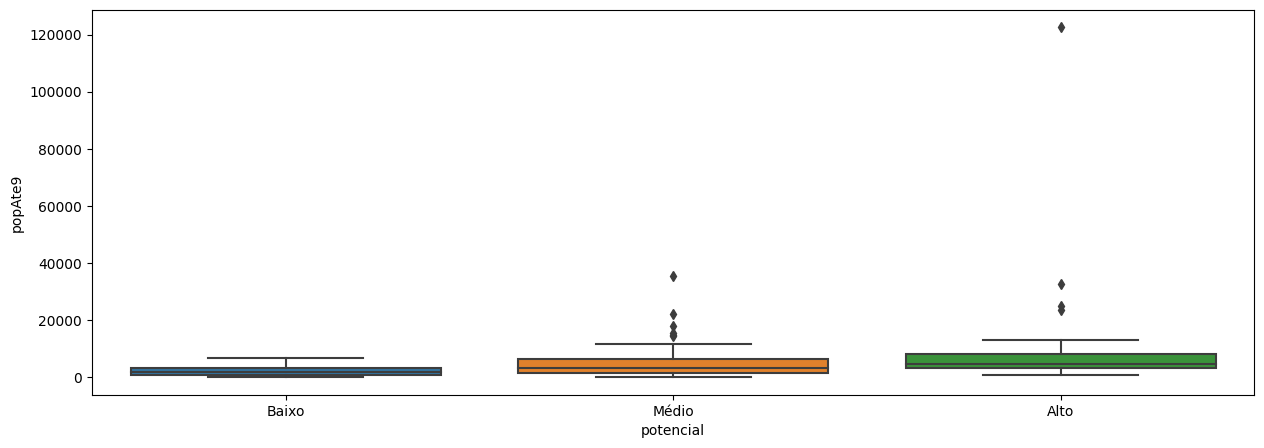

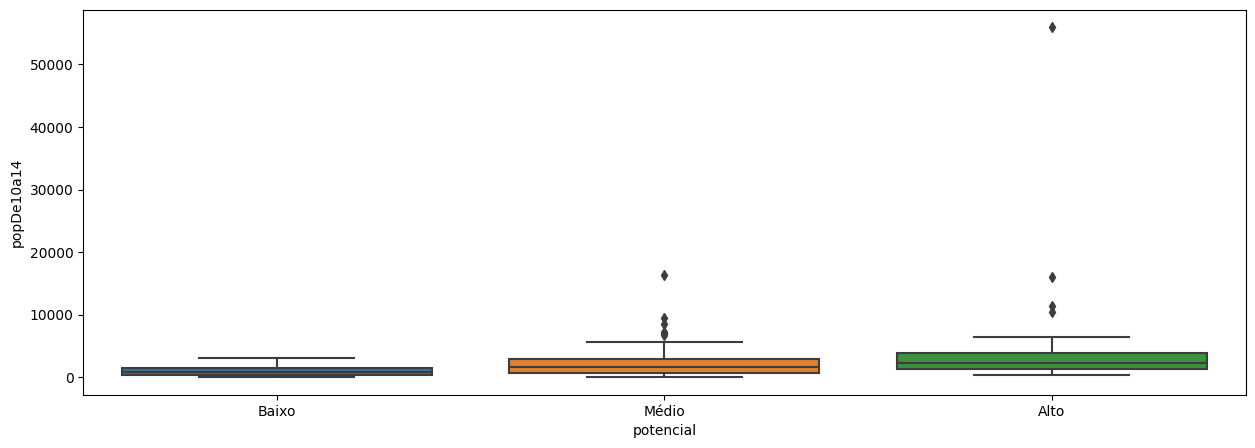

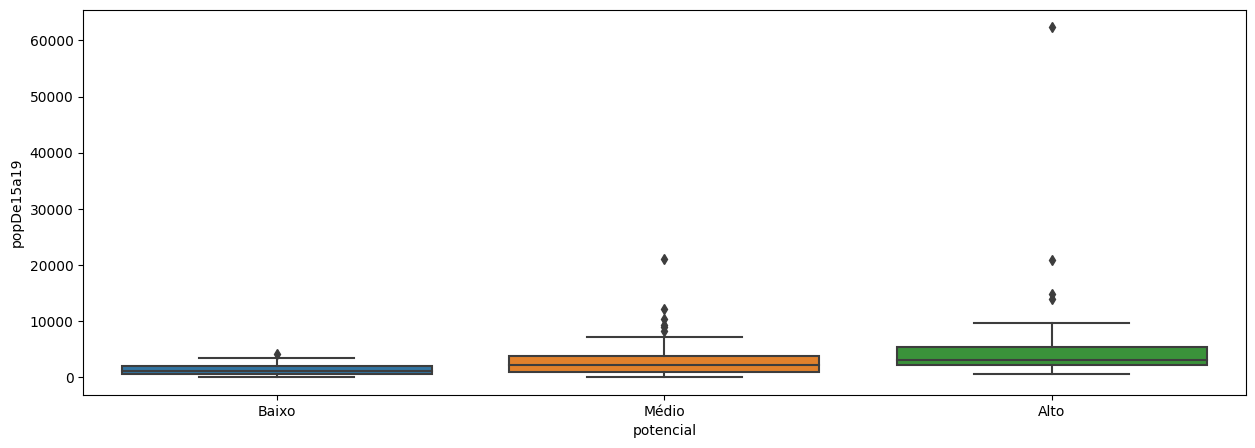

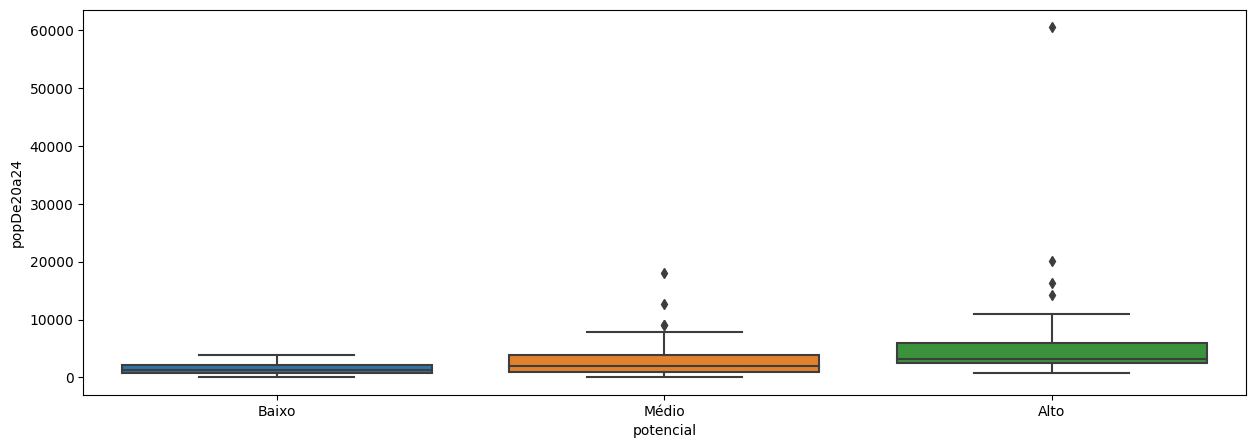

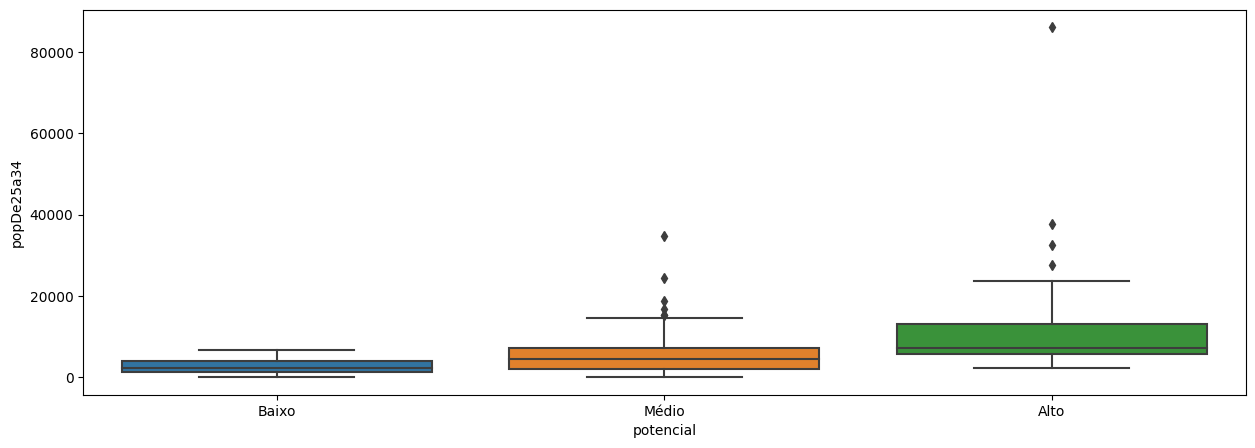

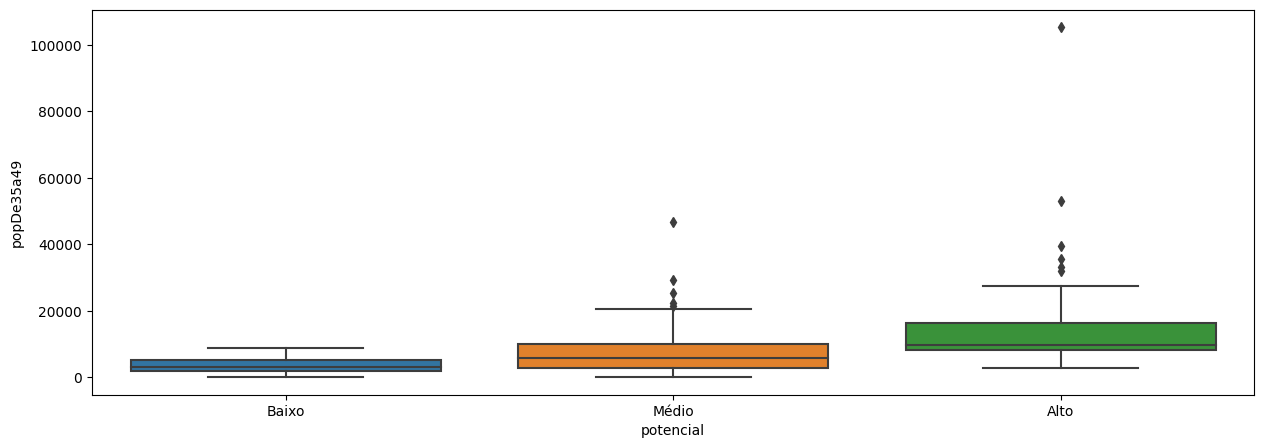

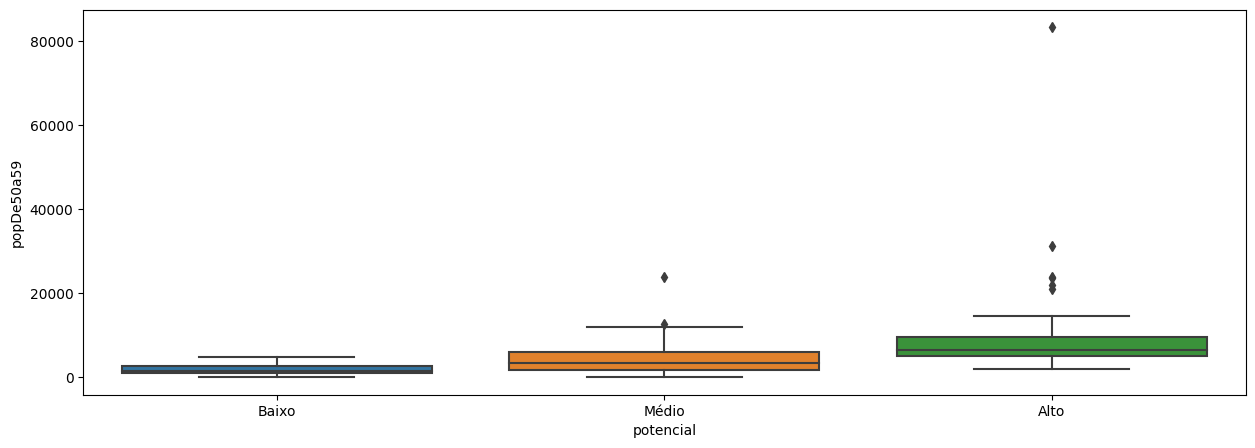

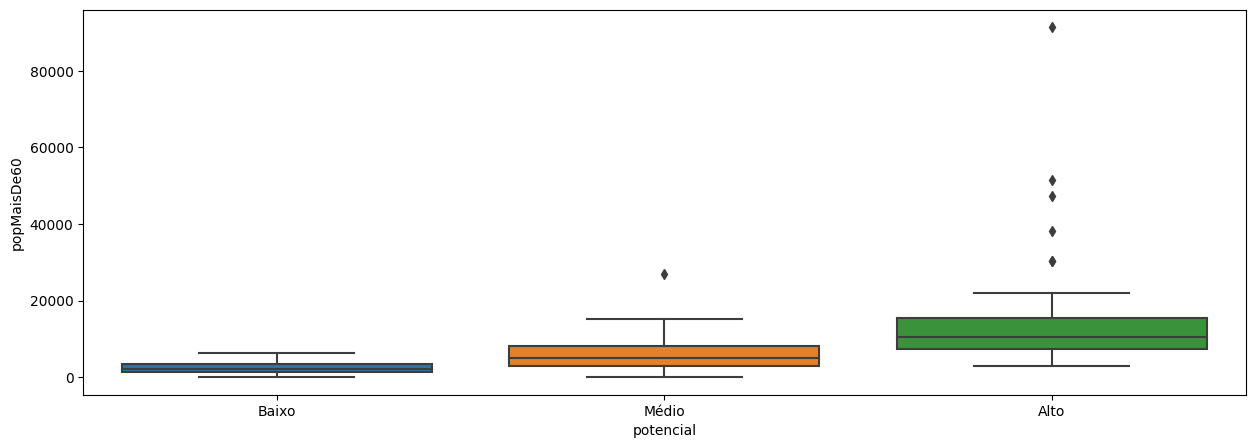

In [123]:
# analise dos dados de população por potencial
for dado in dados_população:
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=clean_df_rj, x='potencial', y=dado, order=potencial_order)
    plt.show()

In [ ]:
# Matriz de correlação RJ
print('-----------------------------------------')
print('Matriz de correlação RJ:')
corr_rj = clean_df_rj.corr(numeric_only=True)
corr_rj.style.background_gradient(cmap='coolwarm')

-----------------------------------------
Matriz de correlação RJ:


,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
população,1.000000,0.970797,0.972057,0.985313,0.990373,0.989377,0.986526,0.991235,0.924673,0.186290,0.293839,0.565726,0.905305,0.928378,0.861343,0.832363,0.822980,-0.026747,-0.166563,0.380326
popAte9,0.970797,1.000000,0.999140,0.994495,0.988292,0.949930,0.934287,0.946176,0.822485,0.043099,0.118759,0.384971,0.790162,0.870195,0.831198,0.808531,0.781555,-0.071316,-0.300307,0.255667
popDe10a14,0.972057,0.999140,1.000000,0.995850,0.987774,0.948990,0.936012,0.949140,0.826978,0.029706,0.108616,0.383258,0.797436,0.876245,0.835387,0.813732,0.784861,-0.078434,-0.306282,0.259085
popDe15a19,0.985313,0.994495,0.995850,1.000000,0.995039,0.970848,0.961319,0.962284,0.852647,0.059684,0.147259,0.425413,0.835775,0.910146,0.869813,0.846498,0.821901,-0.075903,-0.293721,0.296052
popDe20a24,0.990373,0.988292,0.987774,0.995039,1.000000,0.981342,0.967448,0.969580,0.873030,0.103014,0.200898,0.474706,0.856208,0.913433,0.861188,0.833742,0.809816,-0.059987,-0.250416,0.322076
popDe25a34,0.989377,0.949930,0.948990,0.970848,0.981342,1.000000,0.994647,0.969477,0.902734,0.198600,0.303916,0.563934,0.907814,0.951993,0.902184,0.874031,0.863436,-0.037166,-0.195332,0.396222
popDe35a49,0.986526,0.934287,0.936012,0.961319,0.967448,0.994647,1.000000,0.973315,0.916271,0.224111,0.328107,0.588285,0.924404,0.958461,0.905541,0.878573,0.873529,-0.025153,-0.170591,0.421356
popDe50a59,0.991235,0.946176,0.949140,0.962284,0.969580,0.969477,0.973315,1.000000,0.956639,0.247188,0.363377,0.634230,0.924839,0.902424,0.807894,0.774645,0.773025,0.009856,-0.067345,0.417621
popMaisDe60,0.924673,0.822485,0.826978,0.852647,0.873030,0.902734,0.916271,0.956639,1.000000,0.397839,0.550859,0.802572,0.956781,0.846138,0.715222,0.677137,0.703864,0.074336,0.139008,0.497578
domiciliosA1,0.186290,0.043099,0.029706,0.059684,0.103014,0.198600,0.224111,0.247188,0.397839,1.000000,0.925528,0.716429,0.257212,0.047665,-0.040489,-0.071094,0.064017,0.502224,0.754193,0.338494


In [ ]:
cluster_summary = clean_df_rj.groupby('potencial')
cluster_summary.median(numeric_only=True)

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
potencial,,,,,,,,,,,,,,,,,,,
0,15020.5,1906.0,883.0,1144.5,1207.5,2451.5,3240.5,1662.5,2113.0,0.0,1.5,317.0,693.5,1360.0,1225.5,233.5,782.0,1535.0,793291.0
1,27714.5,3371.0,1712.0,2280.0,2151.0,4568.5,6234.0,3425.0,4940.0,0.0,111.5,933.0,1841.5,2800.0,2255.5,366.5,1083.0,1897.0,796358.0
2,46711.5,4551.5,2212.5,3114.0,3246.0,7142.0,9604.0,6420.5,10390.5,144.0,872.0,2995.0,3394.0,4312.0,3304.0,421.5,1657.0,3039.0,1086942.0


In [ ]:
cluster_summary.mean(numeric_only=True)

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
potencial,,,,,,,,,,,,,,,,,,,
0,17156.967742,2237.467742,1047.258065,1385.096774,1441.290323,2775.854839,3633.241935,2008.322581,2628.435484,18.741935,76.532258,425.564516,863.177419,1510.612903,1490.596774,287.887097,975.483871,1664.596491,7.819339e+05
1,41602.840000,5722.720000,2676.280000,3472.960000,3335.900000,6598.480000,8921.820000,4803.220000,6071.460000,55.760000,183.040000,1046.760000,2104.340000,3776.200000,3694.240000,719.000000,2280.500000,3008.285714,7.140762e+05
2,76683.791667,8912.312500,4140.979167,5500.437500,5828.041667,11489.354167,15436.375000,10176.770833,15199.520833,1212.625000,1738.041667,4598.479167,4643.291667,5914.750000,4329.166667,773.770833,2436.520833,6528.229167,1.166706e+06


In [ ]:
cluster_summary.std(numeric_only=True)

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
potencial,,,,,,,,,,,,,,,,,,,
0,11084.985145,1683.903318,773.542796,988.373406,1011.108552,1810.458622,2332.482802,1284.081119,1754.411672,103.379602,236.240411,504.848934,591.543231,956.028437,1127.523624,241.364978,844.479522,628.370707,139058.492489
1,41190.144924,6697.358258,3056.827267,3864.309844,3508.182227,6725.655383,8763.825722,4264.546028,4788.337644,175.931058,385.010626,838.459023,1514.706661,3559.605453,4295.415570,904.911045,2865.285371,3545.869134,334438.324519
2,100005.278860,17873.044429,8171.131262,9235.051758,8995.920707,13488.871755,16819.185006,12483.041917,15299.764183,2372.113329,2424.389978,4215.679764,3864.474950,6133.470735,5291.999909,1093.706838,2594.903237,9686.685390,618101.482448


In [ ]:
# quartiles
cluster_summary.quantile([0.25, 0.5, 0.75])

/tmp/ipykernel_1642/3958578921.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary.quantile([0.25, 0.5, 0.75])


população  popAte9  popDe10a14  popDe15a19  popDe20a24  \
potencial                                                                
0         0.25    9117.75   905.25      424.75      638.50      708.25   
          0.50   15020.50  1906.00      883.00     1144.50     1207.50   
          0.75   25530.75  3233.75     1455.25     1957.75     2107.75   
1         0.25   13462.25  1400.00      721.75      950.75      907.00   
          0.50   27714.50  3371.00     1712.00     2280.00     2151.00   
          0.75   55035.25  7363.50     3505.00     4611.00     4258.75   
2         0.25   39261.75  3115.75     1366.75     2109.25     2393.75   
          0.50   46711.50  4551.50     2212.50     3114.00     3246.00   
          0.75   81809.50  8133.00     3807.25     5343.50     5965.25   

                popDe25a34  popDe35a49  popDe50a59  popMaisDe60  domiciliosA1  \
potencial                                                                       
0         0.25     1415.50     1957.75     1109.00      1439.75           0.0   
          0.50     2451.50     3240.50     1662.50      2113.00           0.0   
          0.75     3983.25     5301.50     2929.00      3766.00           0.0   
1         0.25     2101.00     2982.50     1870.75      2851.00           0.0   
          0.50     4568.50     6234.00     3425.00      4940.00           0.0   
          0.75     7866.75    11417.00     6301.00      8173.75           0.0   
2         0.25     5837.25     8251.75     5055.25      7305.75           0.0   
          0.50     7142.00     9604.00     6420.50     10390.50         144.0   
          0.75    13069.75    16272.00     9532.75     15352.00        1361.5   

                domiciliosA2  domiciliosB1  domiciliosB2  domiciliosC1  \
potencial                                                                
0         0.25          0.00        128.75        483.00        716.00   
          0.50          1.50        317.00        693.50       1360.00   
          0.75         81.50        498.50       1226.25       2187.50   
1         0.25          0.00        698.25       1177.50       1262.75   
          0.50        111.50        933.00       1841.50       2800.00   
          0.75        194.75       1244.50       2478.00       4890.00   
2         0.25        405.50       2030.75       2386.50       2816.50   
          0.50        872.00       2995.00       3394.00       4312.00   
          0.75       1836.25       5270.00       5068.00       6335.25   

                domiciliosC2  domiciliosD  domiciliosE  rendaMedia  \
potencial                                                            
0         0.25        586.50        80.00       290.50     1227.00   
          0.50       1225.50       233.50       782.00     1535.00   
          0.75       2284.75       418.50      1477.75     1884.00   
1         0.25        805.75       105.50       336.00     1384.00   
          0.50       2255.50       366.50      1083.00     1897.00   
          0.75       4224.00       824.00      3746.25     2511.00   
2         0.25       1343.00       178.50       945.25     2051.75   
          0.50       3304.00       421.50      1657.00     3039.00   
          0.75       4443.25       858.25      2802.50     7962.00   

                faturamento  
potencial                    
0         0.25    720843.00  
          0.50    793291.00  
          0.75    846434.75  
1         0.25    554922.75  
          0.50    796358.00  
          0.75    930128.00  
2         0.25    821226.50  
          0.50   1086942.00  
          0.75   1500667.50

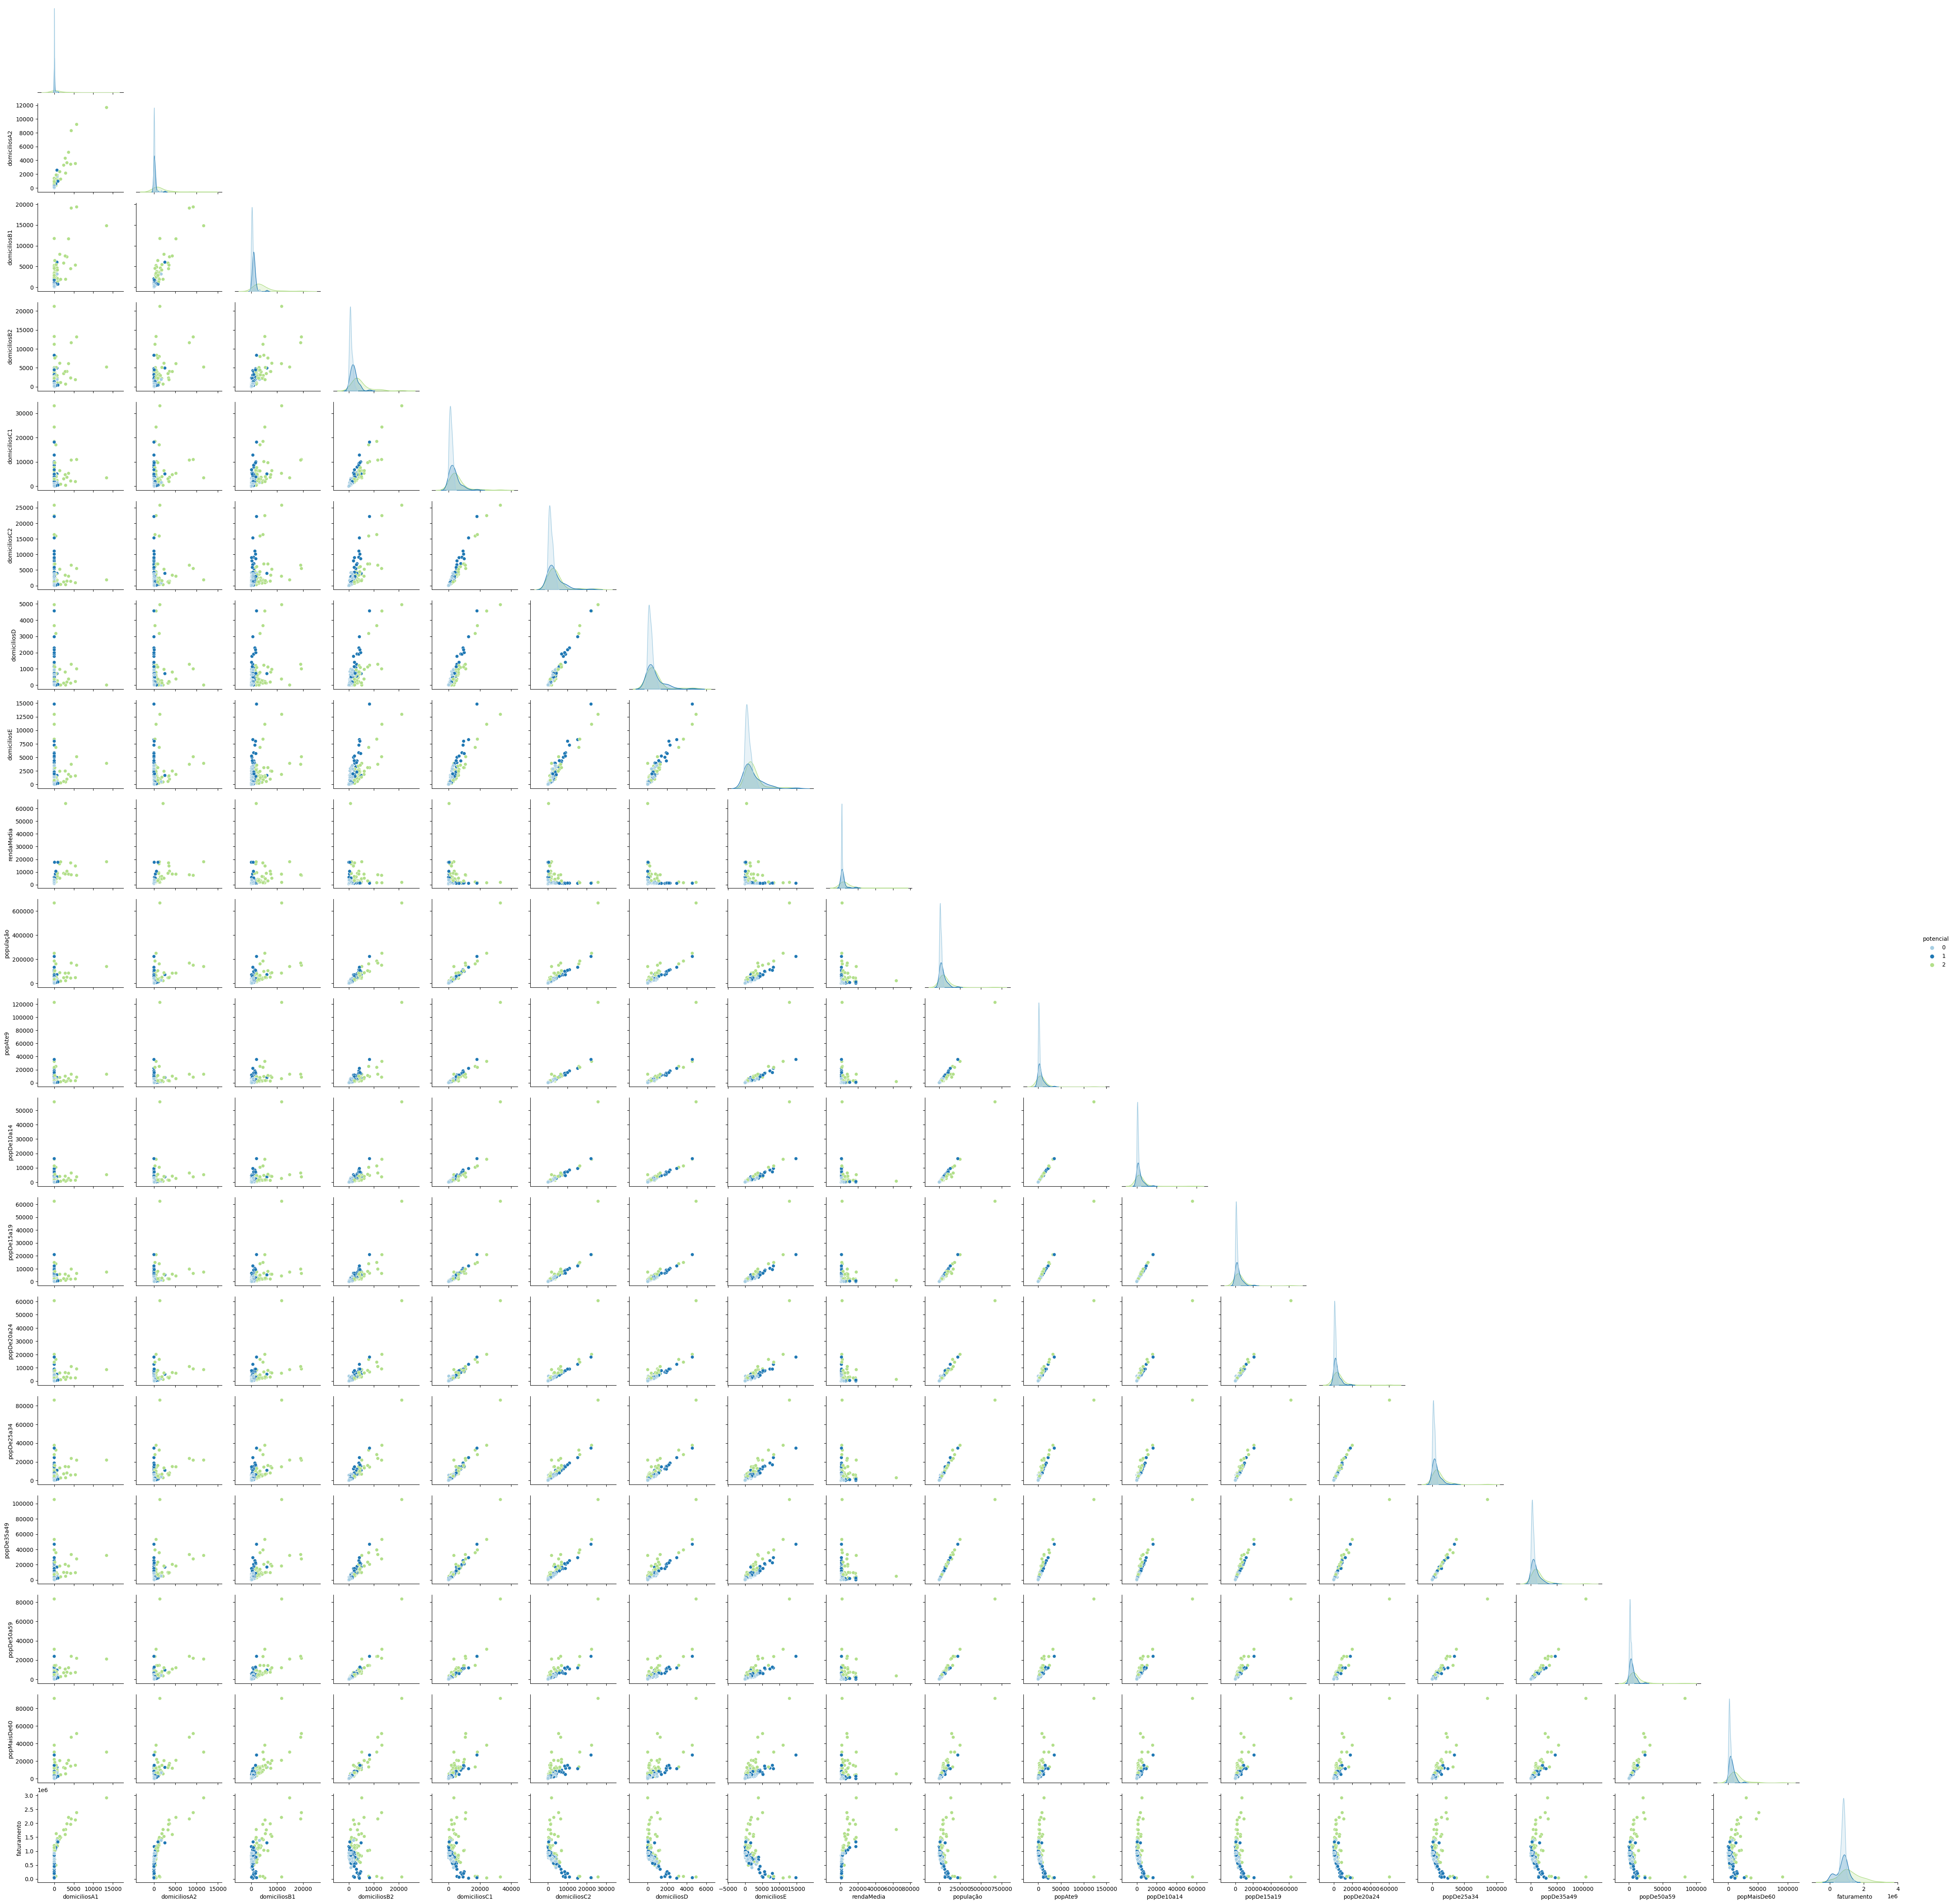

In [ ]:
dados_domicilios = ['domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'domiciliosC1', 'domiciliosC2', 'domiciliosD', 'domiciliosE']
dados_população = ['rendaMedia','população','popAte9','popDe10a14','popDe15a19','popDe20a24','popDe25a34','popDe35a49','popDe50a59','popMaisDe60']
dados_faturamento = ['faturamento']
dados = dados_domicilios + dados_população + dados_faturamento
p=sns.pairplot(clean_df_rj, vars = dados, hue='potencial', palette='Paired',corner=True)
#p.map_lower(sns.kdeplot, levels=4, color=".2", cmap='Paired')
p

<AxesSubplot: xlabel='potencial', ylabel='faturamento'>

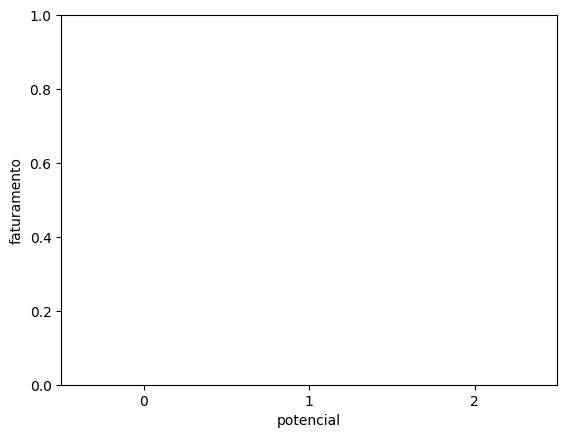

In [ ]:
# boxplot de faturamento por potencial
sns.boxplot(x='potencial', y='faturamento', data=clean_df_rj, palette='Paired', order=['0', '1', '2'])  
